Title: 
    
Analysis of Algerian Forest Fires: An Inferential Explanation of Possible Correlation.

Introduction: 

Large sections of forest are destroyed everyday by forest fires. Not only do these types of natural disasters destroy the trees but they also exterminate and displace wildlife within the threatened ecosystem. Consequently, it would be of great beneficence to be able to pinpoint major factors(atmospheric conditions) contributing to these phenomena(forest fires) and allow for possible combatant scaffolding to be deduced.  The following research will examine a dataset (“Algerian_forest_fires_dataset_UPDATE.csv”) that contains a total of 244 instances of forest fires in two regions of Algeria(Bejaia region and Sidi Bel-abbes region) that were gathered between June and September of 2012. Since the most predominant cause of forest fires is lightning on dry trees and soil in low moisture conditions. To begin we will compare the "RH" column to “Temperature” column. We will analyze each variable to see if there is a correlation between that variable and the possible outcome of fire with respect to RH. 

Preliminary exploratory data analysis:

In [284]:
library(tidyverse)
library(testthat)
library(digest)
library(repr)
library("readxl")
library(tidymodels)
library(lubridate)
library(ggplot2)
library(forcats)
library(cowplot)

The dataset can be read into R using the following read_csv function:Forest_fire <- read.csv("Project/Algerian_forest_fires_dataset_UPDATE.csv", skip=1), however, the dataset is actually consisting of 2 tables and we decided to separate it into two csv files. Hence we would use Bejaia <- read.csv("Bejaia.csv", skip=1), and Sidi_Bel_Abbes <- read_csv("Sidi_Bel_Abbes.csv", skip=1).

In [285]:
id_Bej <- "1zby9kC_wgi3bpMBtvgZACrDTMxZY3MXa" # google file ID
Bejaia <- read_csv(sprintf("https://docs.google.com/uc?id=%s&export=download", id_Bej),skip = 1)

id_SBA <-"1H8TMtO7zSFH80RUYPZbzqEbm207hqe72"
Sidi_Bel_Abbes<-read_csv(sprintf("https://docs.google.com/uc?id=%s&export=download", id_SBA),skip = 1)

Bejaia%>%
   mutate(Class=as_factor(Classes)) %>%
    pull(Class)%>% 
    levels()

Sidi_Bel_Abbes%>%
   mutate(Classes=as_factor(Classes)) %>%
    pull(Classes)%>% 
    levels()

head(Bejaia)
head(Sidi_Bel_Abbes)

Parsed with column specification:
cols(
  day = col_double(),
  month = col_double(),
  year = col_double(),
  Temperature = col_double(),
  RH = col_double(),
  Ws = col_double(),
  Rain = col_double(),
  FFMC = col_double(),
  DMC = col_double(),
  DC = col_double(),
  ISI = col_double(),
  BUI = col_double(),
  FWI = col_double(),
  Classes = col_character()
)

Parsed with column specification:
cols(
  day = col_double(),
  month = col_double(),
  year = col_double(),
  Temperature = col_double(),
  RH = col_double(),
  Ws = col_double(),
  Rain = col_double(),
  FFMC = col_double(),
  DMC = col_double(),
  DC = col_character(),
  ISI = col_double(),
  BUI = col_double(),
  FWI = col_character(),
  Classes = col_character()
)



[1] "not fire" "fire"

[1] "not fire" "fire"

day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire
3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire
5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire
6,6,2012,31,67,14,0.0,82.6,5.8,22.2,3.1,7.0,2.5,fire


day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<chr>
1,6,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire
2,6,2012,30,73,13,4.0,55.7,2.7,7.8,0.6,2.9,0.2,not fire
3,6,2012,29,80,14,2.0,48.7,2.2,7.6,0.3,2.6,0.1,not fire
4,6,2012,30,64,14,0.0,79.4,5.2,15.4,2.2,5.6,1,not fire
5,6,2012,32,60,14,0.2,77.1,6.0,17.6,1.8,6.5,0.9,not fire
6,6,2012,35,54,11,0.1,83.7,8.4,26.3,3.1,9.3,3.1,fire


In [286]:
set.seed(1)

In [287]:
bejaia<- Bejaia %>%       
    mutate(Class=as_factor(Classes)) %>%
    select(-Classes)   

In [288]:
num_obs_bejaia <- nrow(bejaia)
bejaia_class_counts <- bejaia %>%
      group_by(Class) %>%
      summarize(
      n = n(),
      percentage = n() / num_obs_bejaia * 100)
bejaia_class_counts

`summarise()` ungrouping output (override with `.groups` argument)



Class,n,percentage
<fct>,<int>,<dbl>
not fire,63,51.63934
fire,59,48.36066


In [289]:
Sidi_Bel_Abbes <- Sidi_Bel_Abbes %>% 
    filter(Classes != "NA") %>% 
    mutate(Classes= as_factor(Classes))%>%
    mutate(FWI=as.numeric(FWI)) %>%
    mutate(DC=as.numeric(DC))

In [290]:
num_obs_sidi <- nrow(Sidi_Bel_Abbes)
sidi_bel_abbes_class_counts <- Sidi_Bel_Abbes %>%
      group_by(Classes) %>%
      summarize(
      n = n(),
      percentage = n() / num_obs_sidi * 100)
sidi_bel_abbes_class_counts

`summarise()` ungrouping output (override with `.groups` argument)



Classes,n,percentage
<fct>,<int>,<dbl>
not fire,43,35.53719
fire,78,64.46281


We decide to split the dataset into one training set and one testing set, with a 3:1 proportion.

In [291]:
Sidi_Bel_Abbes_split<- initial_split(Sidi_Bel_Abbes, prop = 0.50, strata = Classes)  
Sidi_Bel_Abbes_train <- training(Sidi_Bel_Abbes_split)   
Sidi_Bel_Abbes_test <- testing(Sidi_Bel_Abbes_split)
head(Sidi_Bel_Abbes_train)     
head(Sidi_Bel_Abbes_test)

Bejaia_split<- initial_split(bejaia, prop = 0.50, strata = Class)  
Bejaia_train <- training(Bejaia_split)   
Bejaia_test <- testing(Bejaia_split)
head(Bejaia_train)
head(Bejaia_test)

day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
3,6,2012,29,80,14,2.0,48.7,2.2,7.6,0.3,2.6,0.1,not fire
5,6,2012,32,60,14,0.2,77.1,6.0,17.6,1.8,6.5,0.9,not fire
7,6,2012,35,44,17,0.2,85.6,9.9,28.9,5.4,10.7,6.0,fire
10,6,2012,30,41,15,0.0,89.4,13.3,22.5,8.4,13.1,10.0,fire
11,6,2012,31,42,21,0.0,90.6,18.2,30.5,13.4,18.0,16.7,fire
12,6,2012,27,58,17,0.0,88.9,21.3,37.8,8.7,21.2,12.9,fire


day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,6,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire
2,6,2012,30,73,13,4.0,55.7,2.7,7.8,0.6,2.9,0.2,not fire
4,6,2012,30,64,14,0.0,79.4,5.2,15.4,2.2,5.6,1.0,not fire
6,6,2012,35,54,11,0.1,83.7,8.4,26.3,3.1,9.3,3.1,fire
8,6,2012,28,51,17,1.3,71.4,7.7,7.4,1.5,7.3,0.8,not fire
9,6,2012,27,59,18,0.1,78.1,8.5,14.7,2.4,8.3,1.9,not fire


day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Class
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire
4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire
5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire
7,6,2012,33,54,13,0.0,88.2,9.9,30.5,6.4,10.9,7.2,fire
8,6,2012,30,73,15,0.0,86.6,12.1,38.3,5.6,13.5,7.1,fire
11,6,2012,31,65,14,0.0,84.5,12.5,54.3,4.0,15.8,5.6,fire


day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Class
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
6,6,2012,31,67,14,0.0,82.6,5.8,22.2,3.1,7.0,2.5,fire
9,6,2012,25,88,13,0.2,52.9,7.9,38.8,0.4,10.5,0.3,not fire
10,6,2012,28,79,12,0.0,73.2,9.5,46.3,1.3,12.6,0.9,not fire
17,6,2012,30,89,16,0.6,37.3,1.1,7.8,0.0,1.6,0.0,not fire


In [292]:
Sidi_Bel_Abbes_Tem <- Sidi_Bel_Abbes_train %>% 
    select(Temperature, RH, Classes) %>%
ggplot(aes(x=Temperature, y= RH, color = Classes))+
geom_point()+
xlab("Temperature")+
ylab("Relative Humidity")+
labs(title="Sidi Bel Abbes Relative Humidity vs Temperature") +
    scale_color_manual (values=c("fire"="tomato","not fire"="skyblue2"))

Bejaia_Tem <- Bejaia_train %>% 
    select(Temperature, RH, Class)%>%
    ggplot(aes(x=Temperature, y= RH, color = Class))+
    geom_point()+
    xlab("Temperature")+
    ylab("Relative Humidity")+
    labs(title="Bejaia Relative Humidity vs Temperature") +
    scale_color_manual (values=c("fire"="tomato", "not fire"="skyblue2"))

Bejaia_RH_FFMC <- Bejaia_train %>%
    select(RH, Class, FFMC) %>%
    ggplot(aes(x=FFMC,y=RH,color=Class)) +
    geom_point() + 
    labs(y="Relative Humidity (%)", x="Fine Fuel Moisture Code",title="RH vs Fine Fuel Moisture Code (BEJAIA)") +
    scale_color_manual (values=c("fire"="tomato", "not fire"="skyblue2"))

Sidi_Bel_Abbes_RH_FFMC <- Sidi_Bel_Abbes_train %>% 
    select(RH,FFMC,Classes) %>%
    ggplot(aes(x=FFMC,y=RH,color=Classes)) +
    geom_point() + 
    labs(y="Relative Humidity (%)", x="Fine Fuel Moisture Code", title="RH vs Fine Fuel Moisture (SIDI BEL ABBES)")+
    scale_color_manual (values=c("fire"="tomato","not fire"="skyblue2"))

Bejaia_RH_DMC <- Bejaia_train %>%
    select(RH, Class, DMC) %>%   
    ggplot(aes(x=DMC,y=RH,color=Class)) +
    geom_point() + 
    labs(y="Relative Humidity (%)", x="Duff Moisture Code",title="RH vs Duff Moisture Code (BEJAIA)")+
    scale_color_manual (values=c("fire"="tomato", "not fire"="skyblue2"))

Sidi_Bel_Abbes_RH_DMC <- Sidi_Bel_Abbes_train%>% 
    select(RH,DMC,Classes) %>%
    ggplot(aes(x=DMC,y=RH,color=Classes)) +
    geom_point() + 
    labs(y="Relative Humidity (%)", x="Duff Moisture Code",title="RH vs Duff Moisture Code (SIDI BEL ABBES)") +
    scale_color_manual (values=c("fire"="tomato", "not fire"="skyblue2"))

Sidi_Bel_Abbes_Ws <- Sidi_Bel_Abbes_train %>% 
    select(Ws, RH, Classes)%>%
    ggplot(aes(x=Ws, y= RH, color = Classes))+
    geom_point()+
    xlab("Wind Speed")+
    ylab("Relative Humidity")+
    labs(title="Sidi Bel Abbes Relative Humidity vs Wind Speed") +
    scale_color_manual (values=c("fire"="tomato", "not fire"="skyblue2"))

Bejaia_Ws <- Bejaia_train %>% 
    select(Ws, RH, Class)%>%
    ggplot(aes(x=Ws, y= RH, color = Class))+
    geom_point()+
    xlab("Wind Speed")+
    ylab("Relative Humidity")+
    labs(title="Bejaia Relative Humidity vs Wind Speed") +
    scale_color_manual (values=c("fire"="tomato", "not fire"="skyblue2"))

Bejaia_RH_FWI <- Bejaia_train %>%
    select(FWI, Class, RH) %>%
    ggplot(aes(x=FWI,y=RH,color=Class)) +
    geom_point() + 
    labs(y="Relative Humidity (%)", x="Fire Weather Index",title="RH vs Fire Weather Index(Bejaia)") +
    scale_color_manual (values=c("fire"="tomato", "not fire"="skyblue2"))

Sidi_Bel_Abbes_RH_FWI <- Sidi_Bel_Abbes_train%>% 
    select(RH,FWI,Classes) %>%
    ggplot(aes(x=FWI,y=RH,color=Classes)) +
    geom_point() + 
    labs(y="Relative Humidity (%)", x="Fire Weather Index", title="RH vs Fire Weather Index(SIDI BEL ABBES)")+
    scale_color_manual (values=c("fire"="tomato", "not fire"="skyblue2")) 

Bejaia_RH_Rain <- Bejaia_train %>%
    select(RH, Class, Rain) %>%
    ggplot(aes(x=Rain,y=RH,color=Class)) +
    geom_point() + 
    labs(y="Relative Humidity (%)", x="Rain",title="RH vs Rain (BEJAIA)") +
    scale_color_manual (values=c("fire"="tomato", "not fire"="skyblue2"))

Sidi_Bel_Abbes_RH_Rain <- Sidi_Bel_Abbes_train%>% 
    select(RH,Rain,Classes) %>%
    ggplot(aes(x=Rain,y=RH,color=Classes)) +
    geom_point() + 
    labs(y="Relative Humidity (%)", x="Rain", title="RH vs Rain (SIDI BEL ABBES)")+
    scale_color_manual (values=c("fire"="tomato",  "not fire"="skyblue2"))

Bejaia_RH_BUI <- Bejaia_train %>%
    select(RH, Class, BUI) %>%
    ggplot(aes(x=BUI,y=RH,color=Class)) +
    geom_point() + 
    labs(y="Relative Humidity (%)", x="Build Up Index",title="RH vs Build Up Index (BEJAIA)") +
    scale_color_manual (values=c("fire"="tomato", "not fire"="skyblue2"))

Sidi_Bel_Abbes_RH_BUI <- Sidi_Bel_Abbes_train%>% 
    select(RH,BUI,Classes) %>%
    ggplot(aes(x=BUI,y=RH,color=Classes)) +
    geom_point() + 
    labs(y="Relative Humidity (%)", x="Build Up Index", title="RH vs Build Up Index(SIDI BEL ABBES)")+
    scale_color_manual (values=c("fire"="tomato", "not fire"="skyblue2"))

Sidi_Bel_Abbes_DC <- Sidi_Bel_Abbes_train %>% 
    select(DC, RH, Classes)%>%
    filter(Classes != "NA") %>%
    ggplot(aes(x=DC, y= RH, color = Classes))+
    geom_point()+
    xlab("Drought Code Index")+
    ylab("Relative Humidity")+
    labs(title="Sidi Bel Abbes Relative Humidity vs Drought Code Index") +
    scale_color_manual (values=c("fire"="tomato", "not fire"="skyblue2"))

Bejaia_DC <- Bejaia_train %>% 
    select(DC, RH, Class)%>%
    filter(Class != "NA") %>%
    filter(Class != '') %>%
    ggplot(aes(x=DC, y= RH, color = Class))+
    geom_point()+
    xlab("Drought Code Index")+
    ylab("Relative Humidity")+
    labs(title="Bejaia Relative Humidity vs Drought Code Index") +
    scale_color_manual (values=c("fire"="tomato", "not fire"="skyblue2"))

Sidi_Bel_Abbes_ISI <- Sidi_Bel_Abbes_train %>% 
    select(ISI, RH, Classes)%>%
    ggplot(aes(x=ISI, y= RH, color = Classes))+
    geom_point()+
    xlab("Initial Spread Index")+
    ylab("Relative Humidity")+
    labs(title="Sidi Bel Abbes Relative Humidity vs Initial Spread Index")+
    scale_color_manual (values=c("fire"="tomato","not fire"="skyblue2"))

Bejaia_ISI <- Bejaia_train %>% 
    select(ISI, RH, Class)%>%
    ggplot(aes(x=ISI, y= RH, color = Class))+
    geom_point()+
    xlab("Initial Spread Index")+
    ylab("Relative Humidity")+
    labs(title="Bejaia Relative Humidity vs Initial Spread Index")+
    scale_color_manual (values=c("fire"="tomato", "not fire"="skyblue2"))

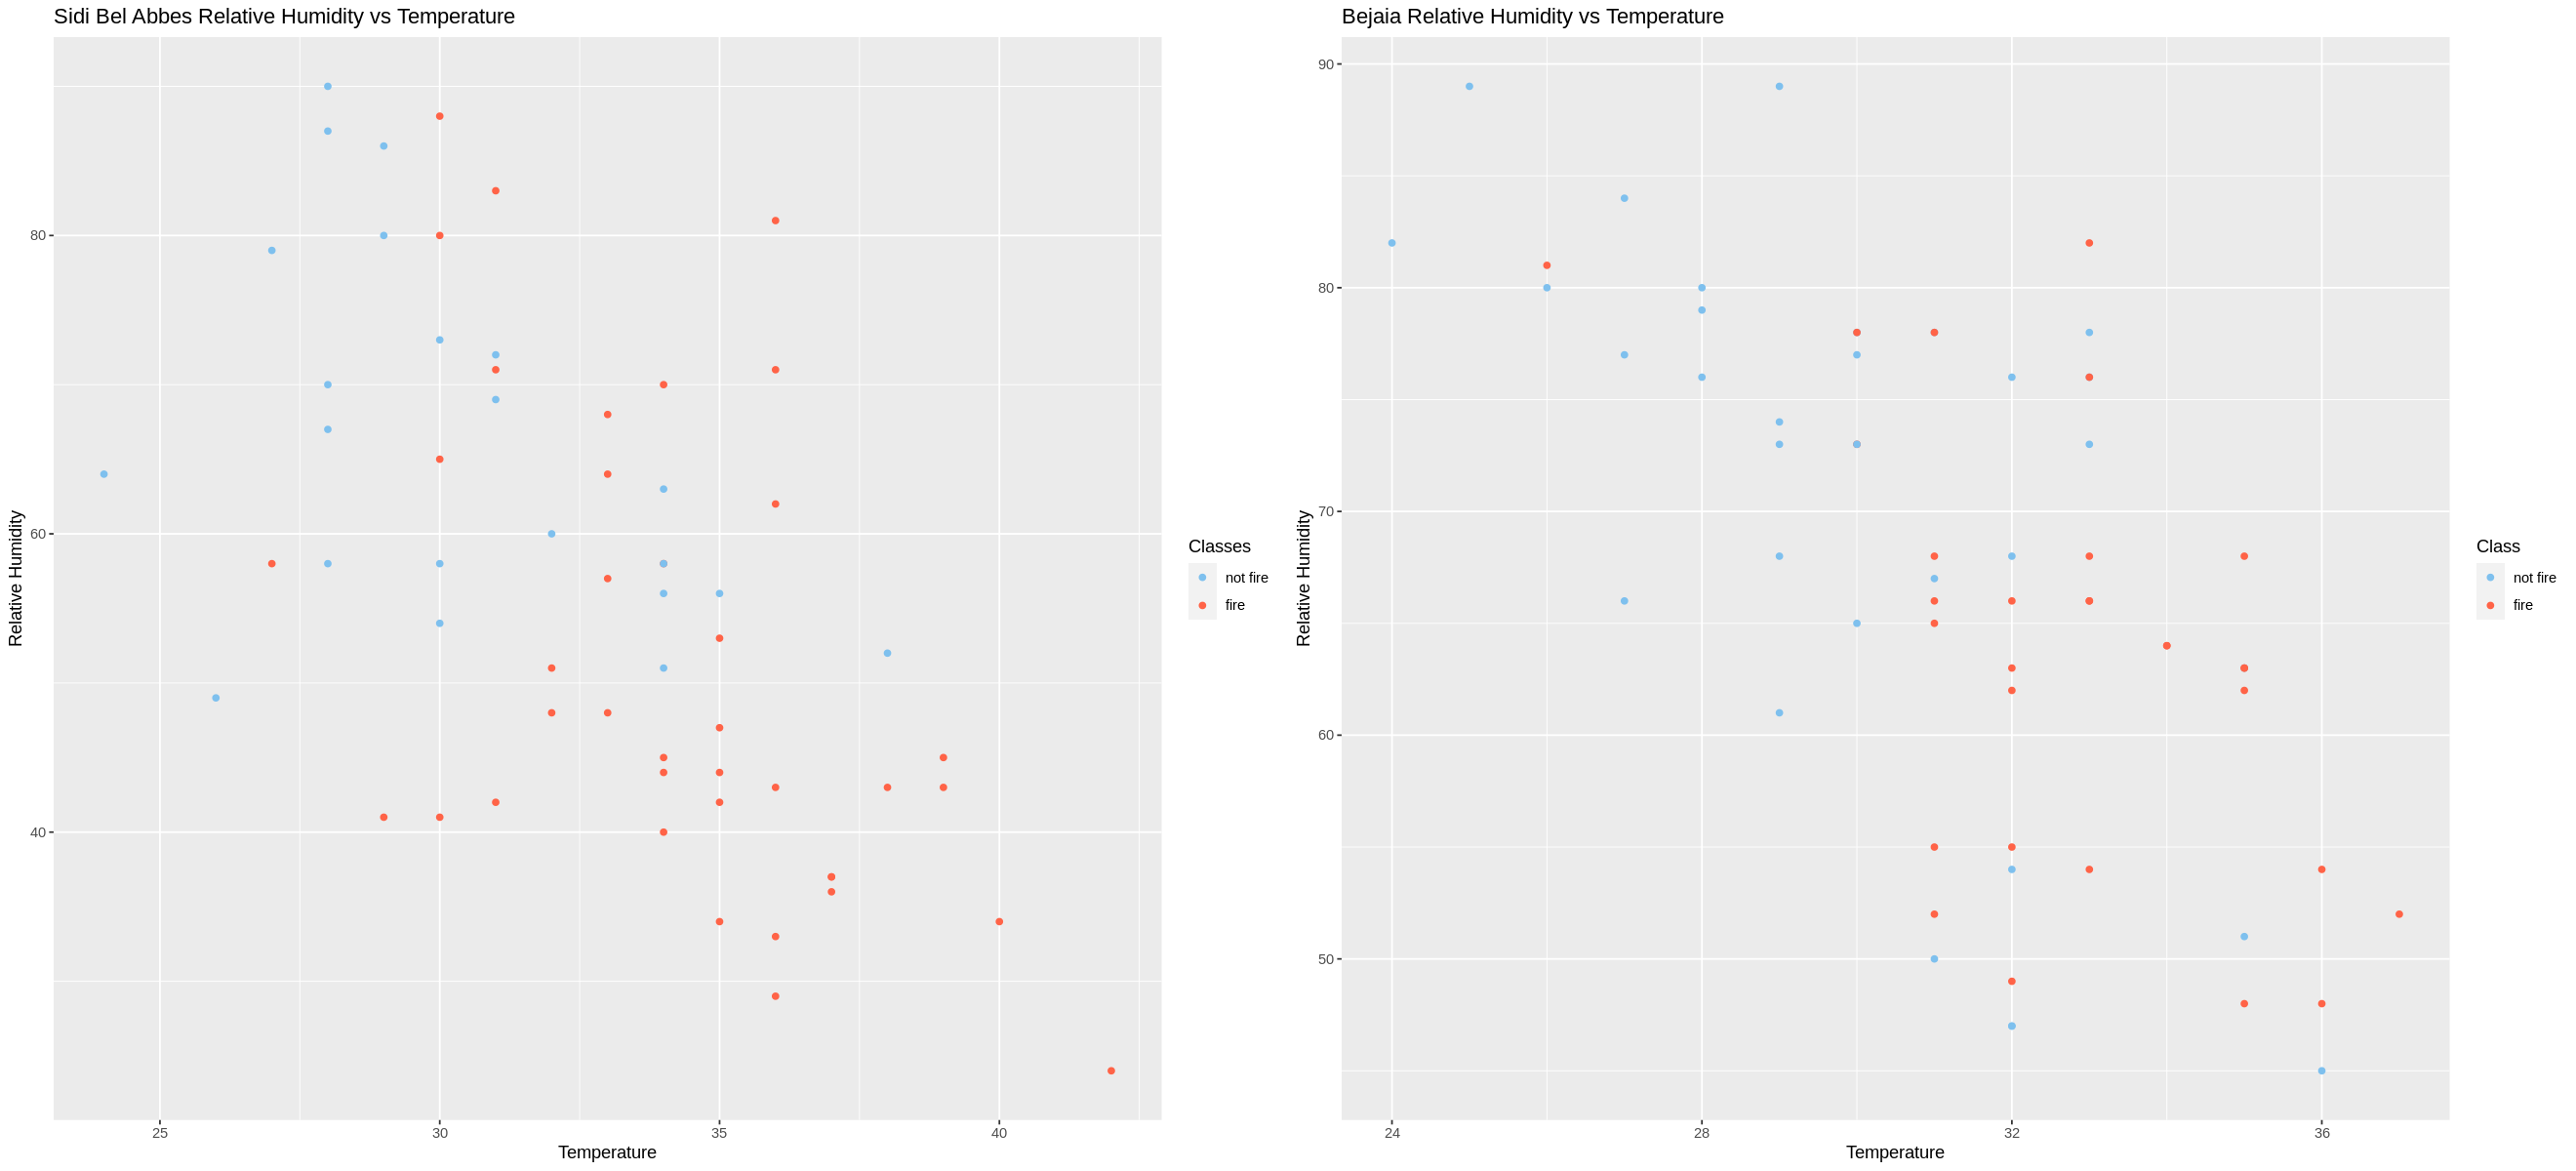

In [293]:
options(repr.plot.width = 22, repr.plot.height = 10)
Temp_plots <- plot_grid(Sidi_Bel_Abbes_Tem, Bejaia_Tem)
Temp_plots

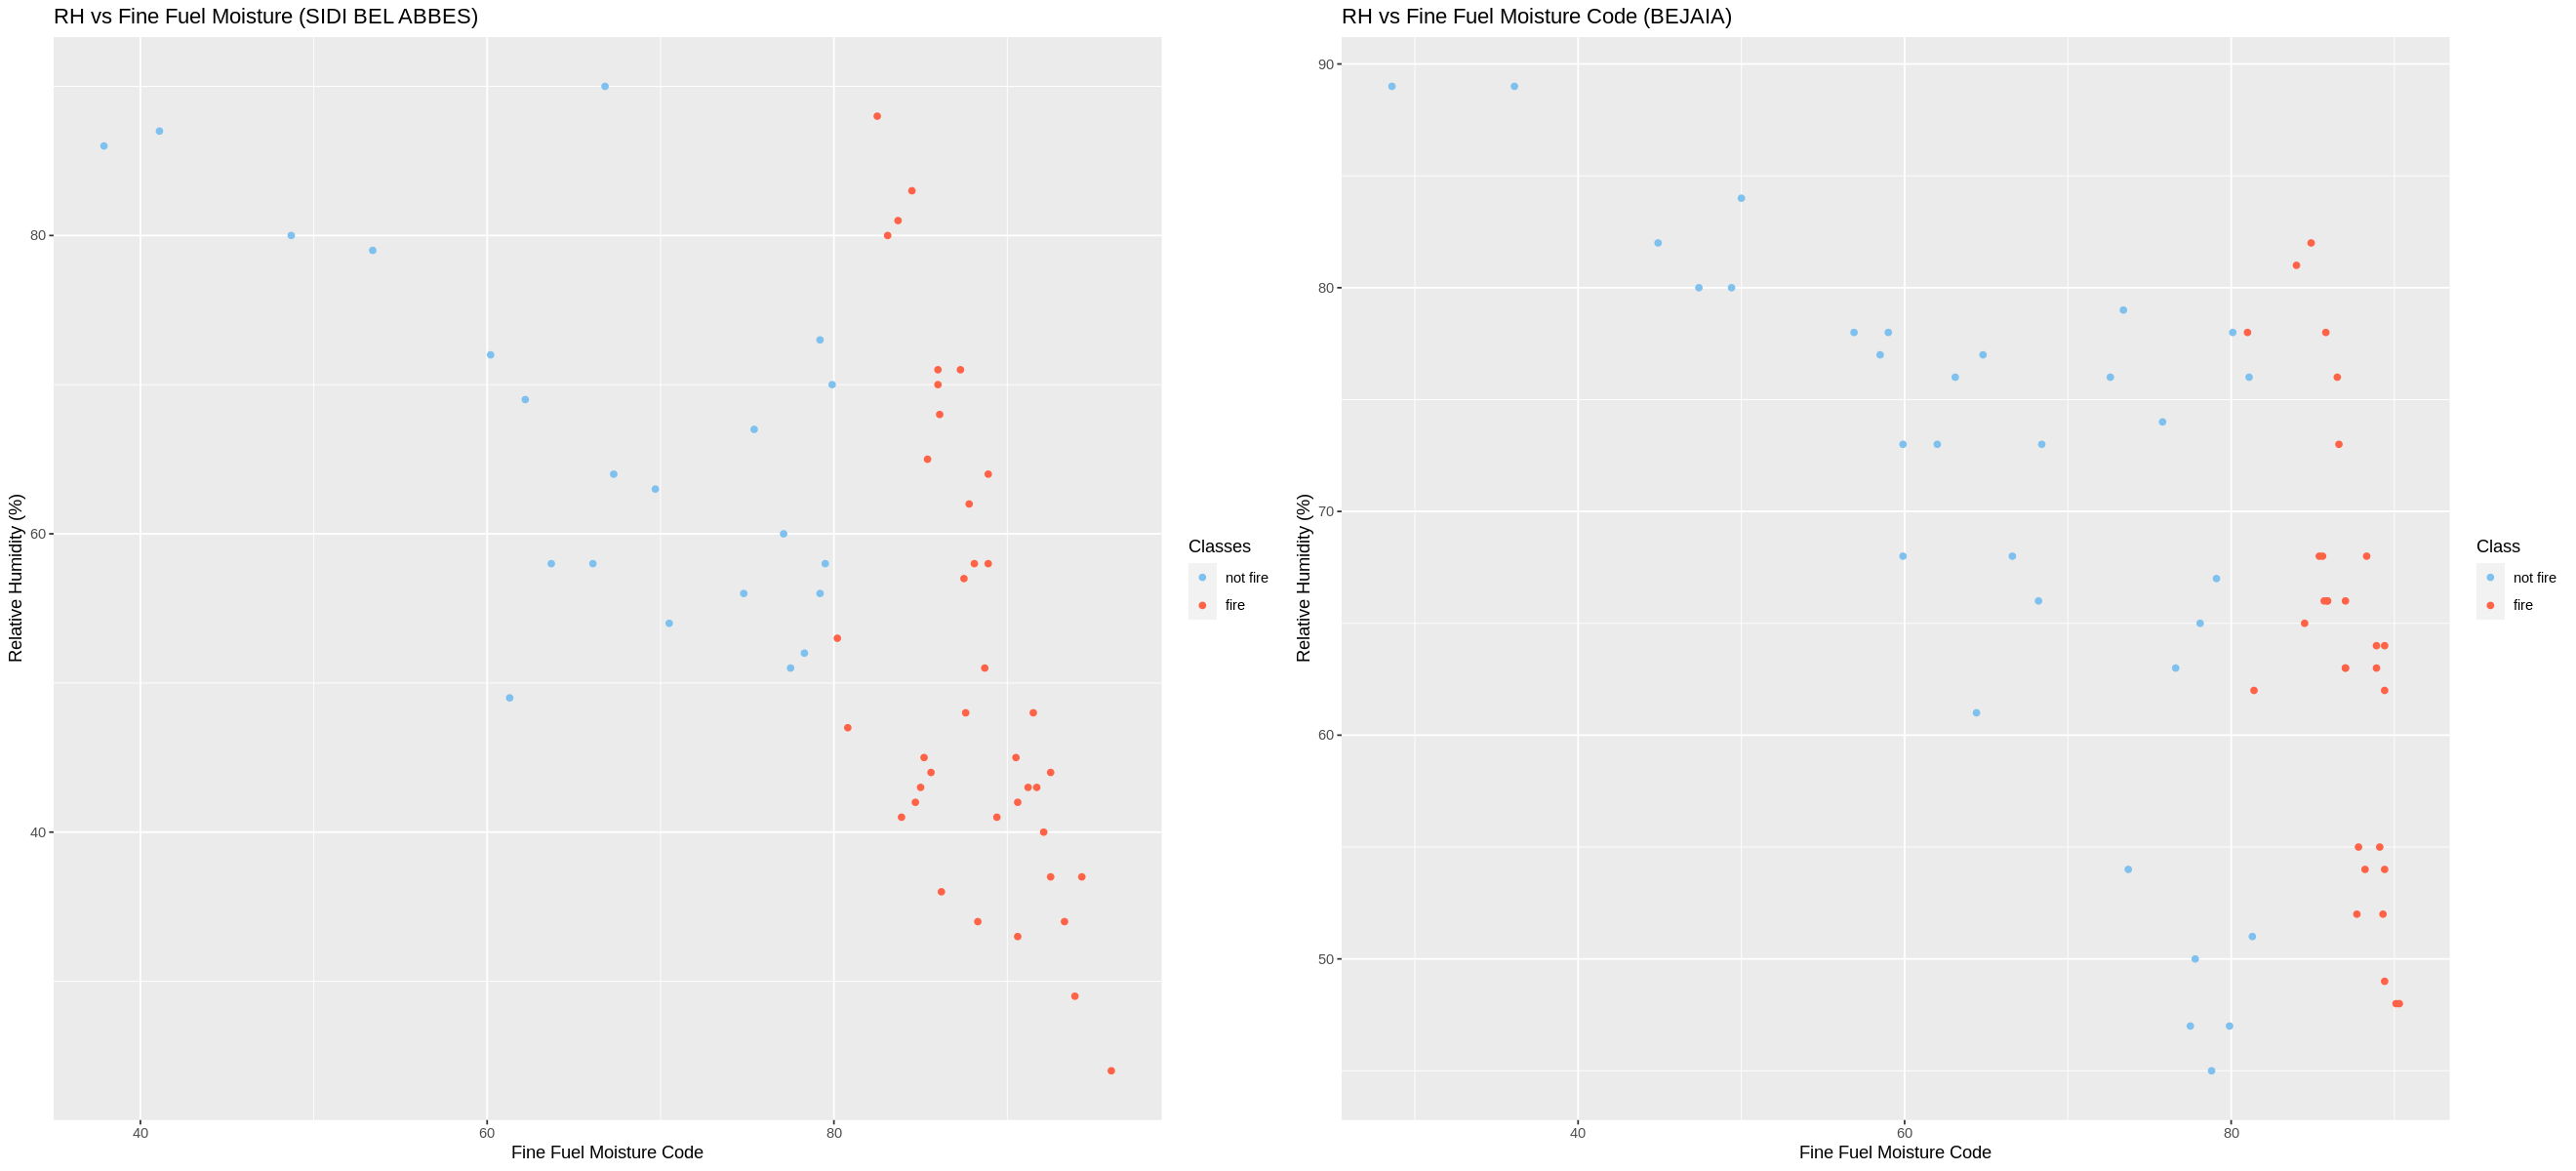

In [294]:
options(repr.plot.width = 22, repr.plot.height = 10)
FFMC_plots <- plot_grid(Sidi_Bel_Abbes_RH_FFMC, Bejaia_RH_FFMC)
FFMC_plots

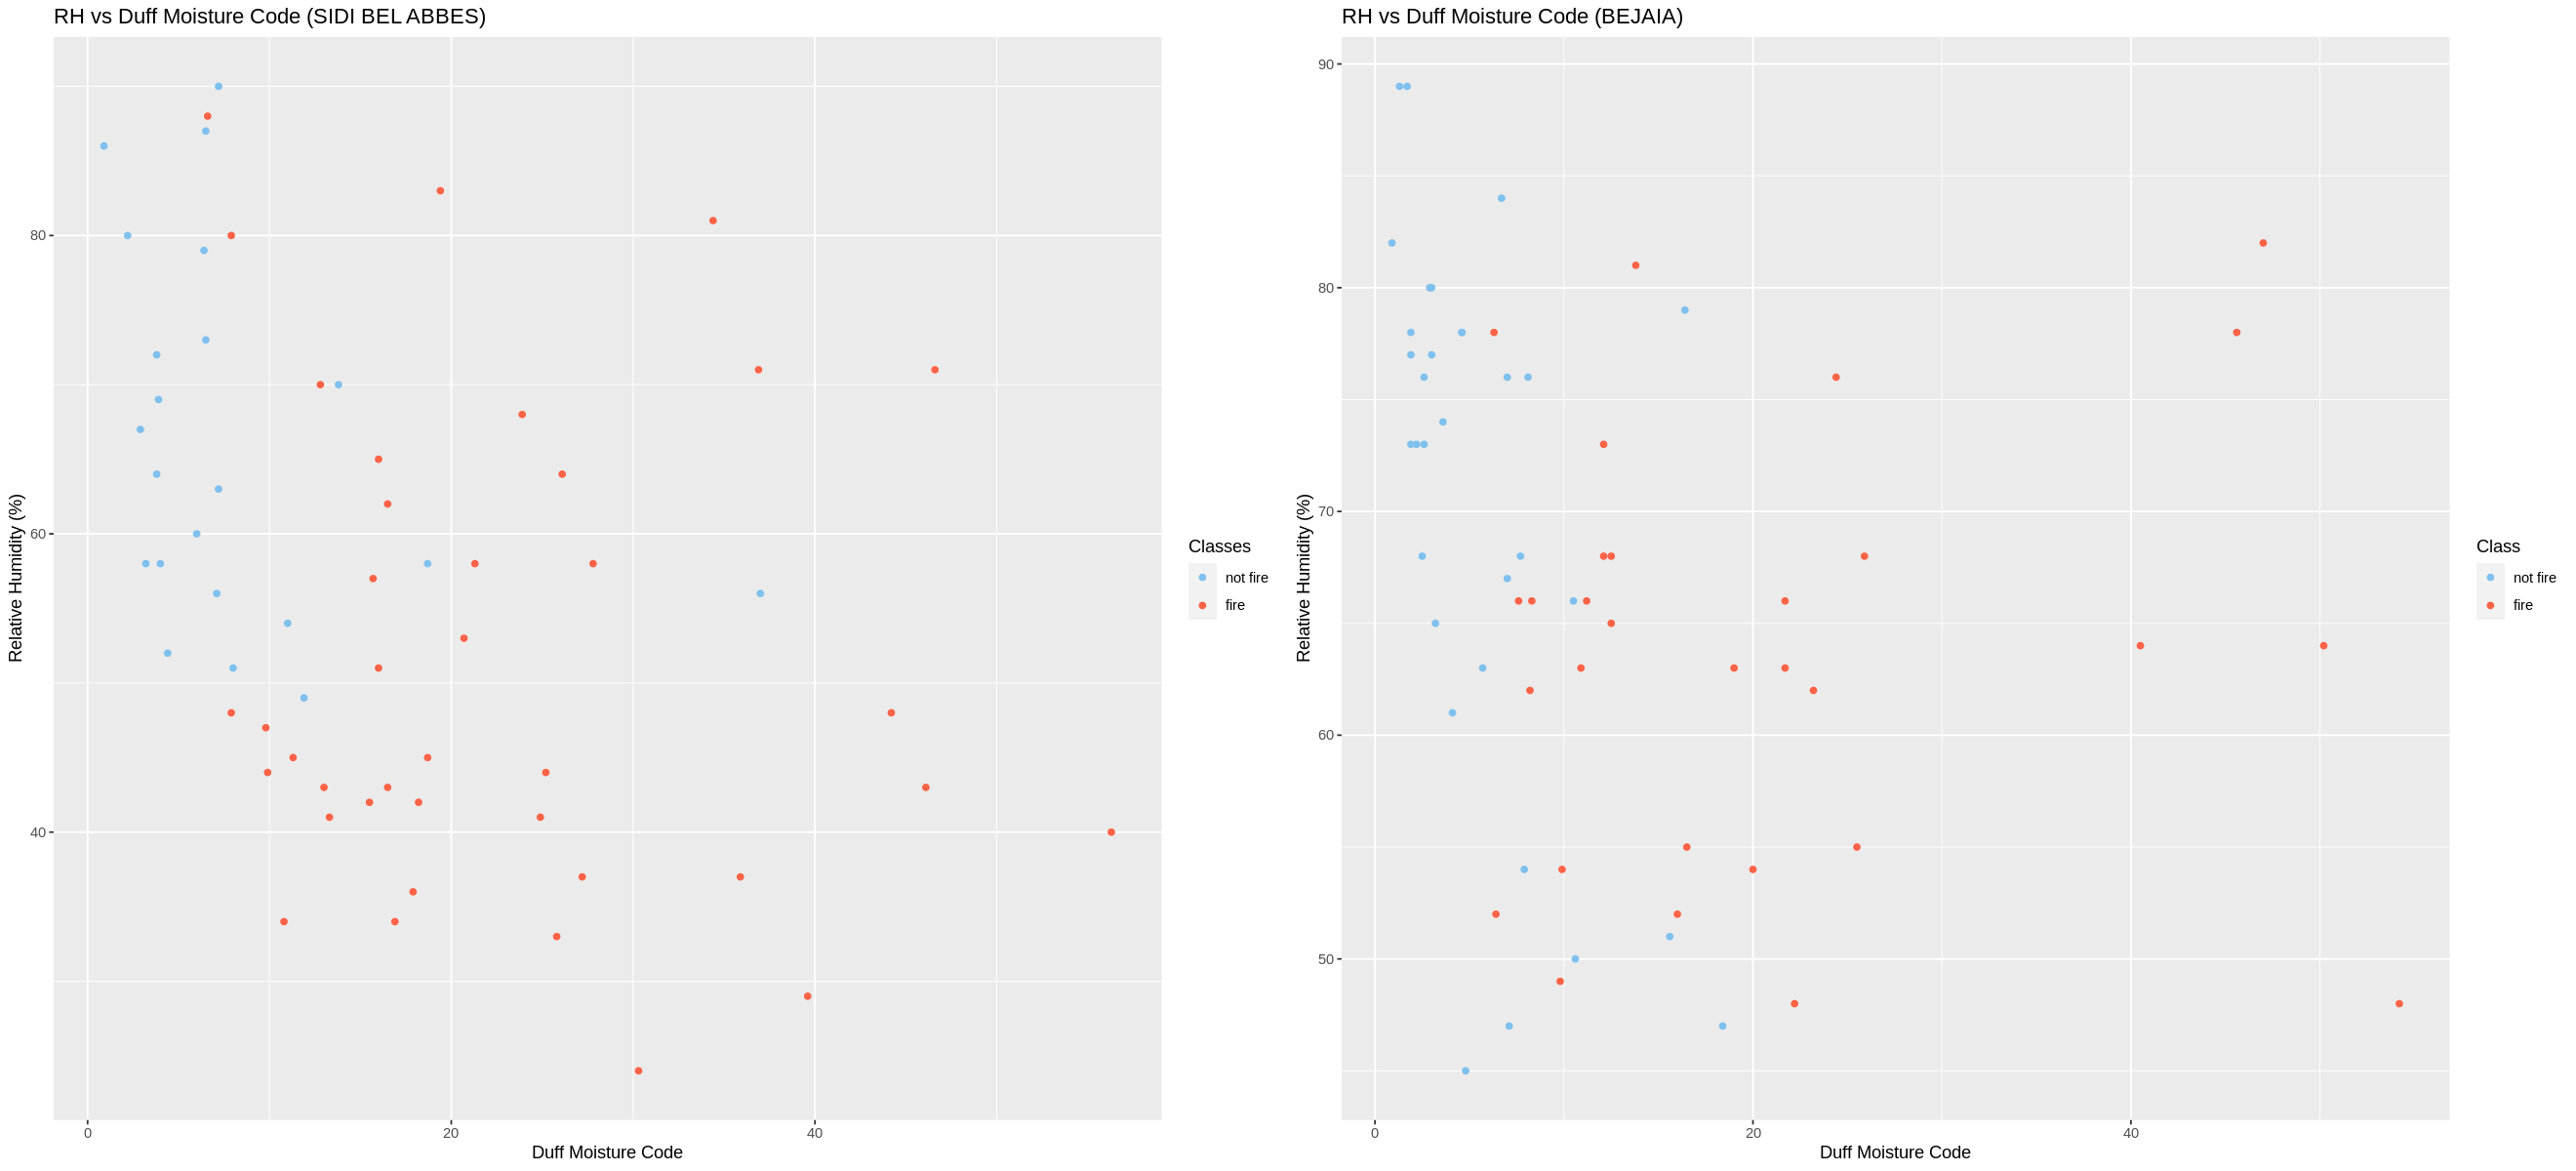

In [295]:
options(repr.plot.width = 22, repr.plot.height = 10)
DMC_plots <- plot_grid(Sidi_Bel_Abbes_RH_DMC, Bejaia_RH_DMC)
DMC_plots

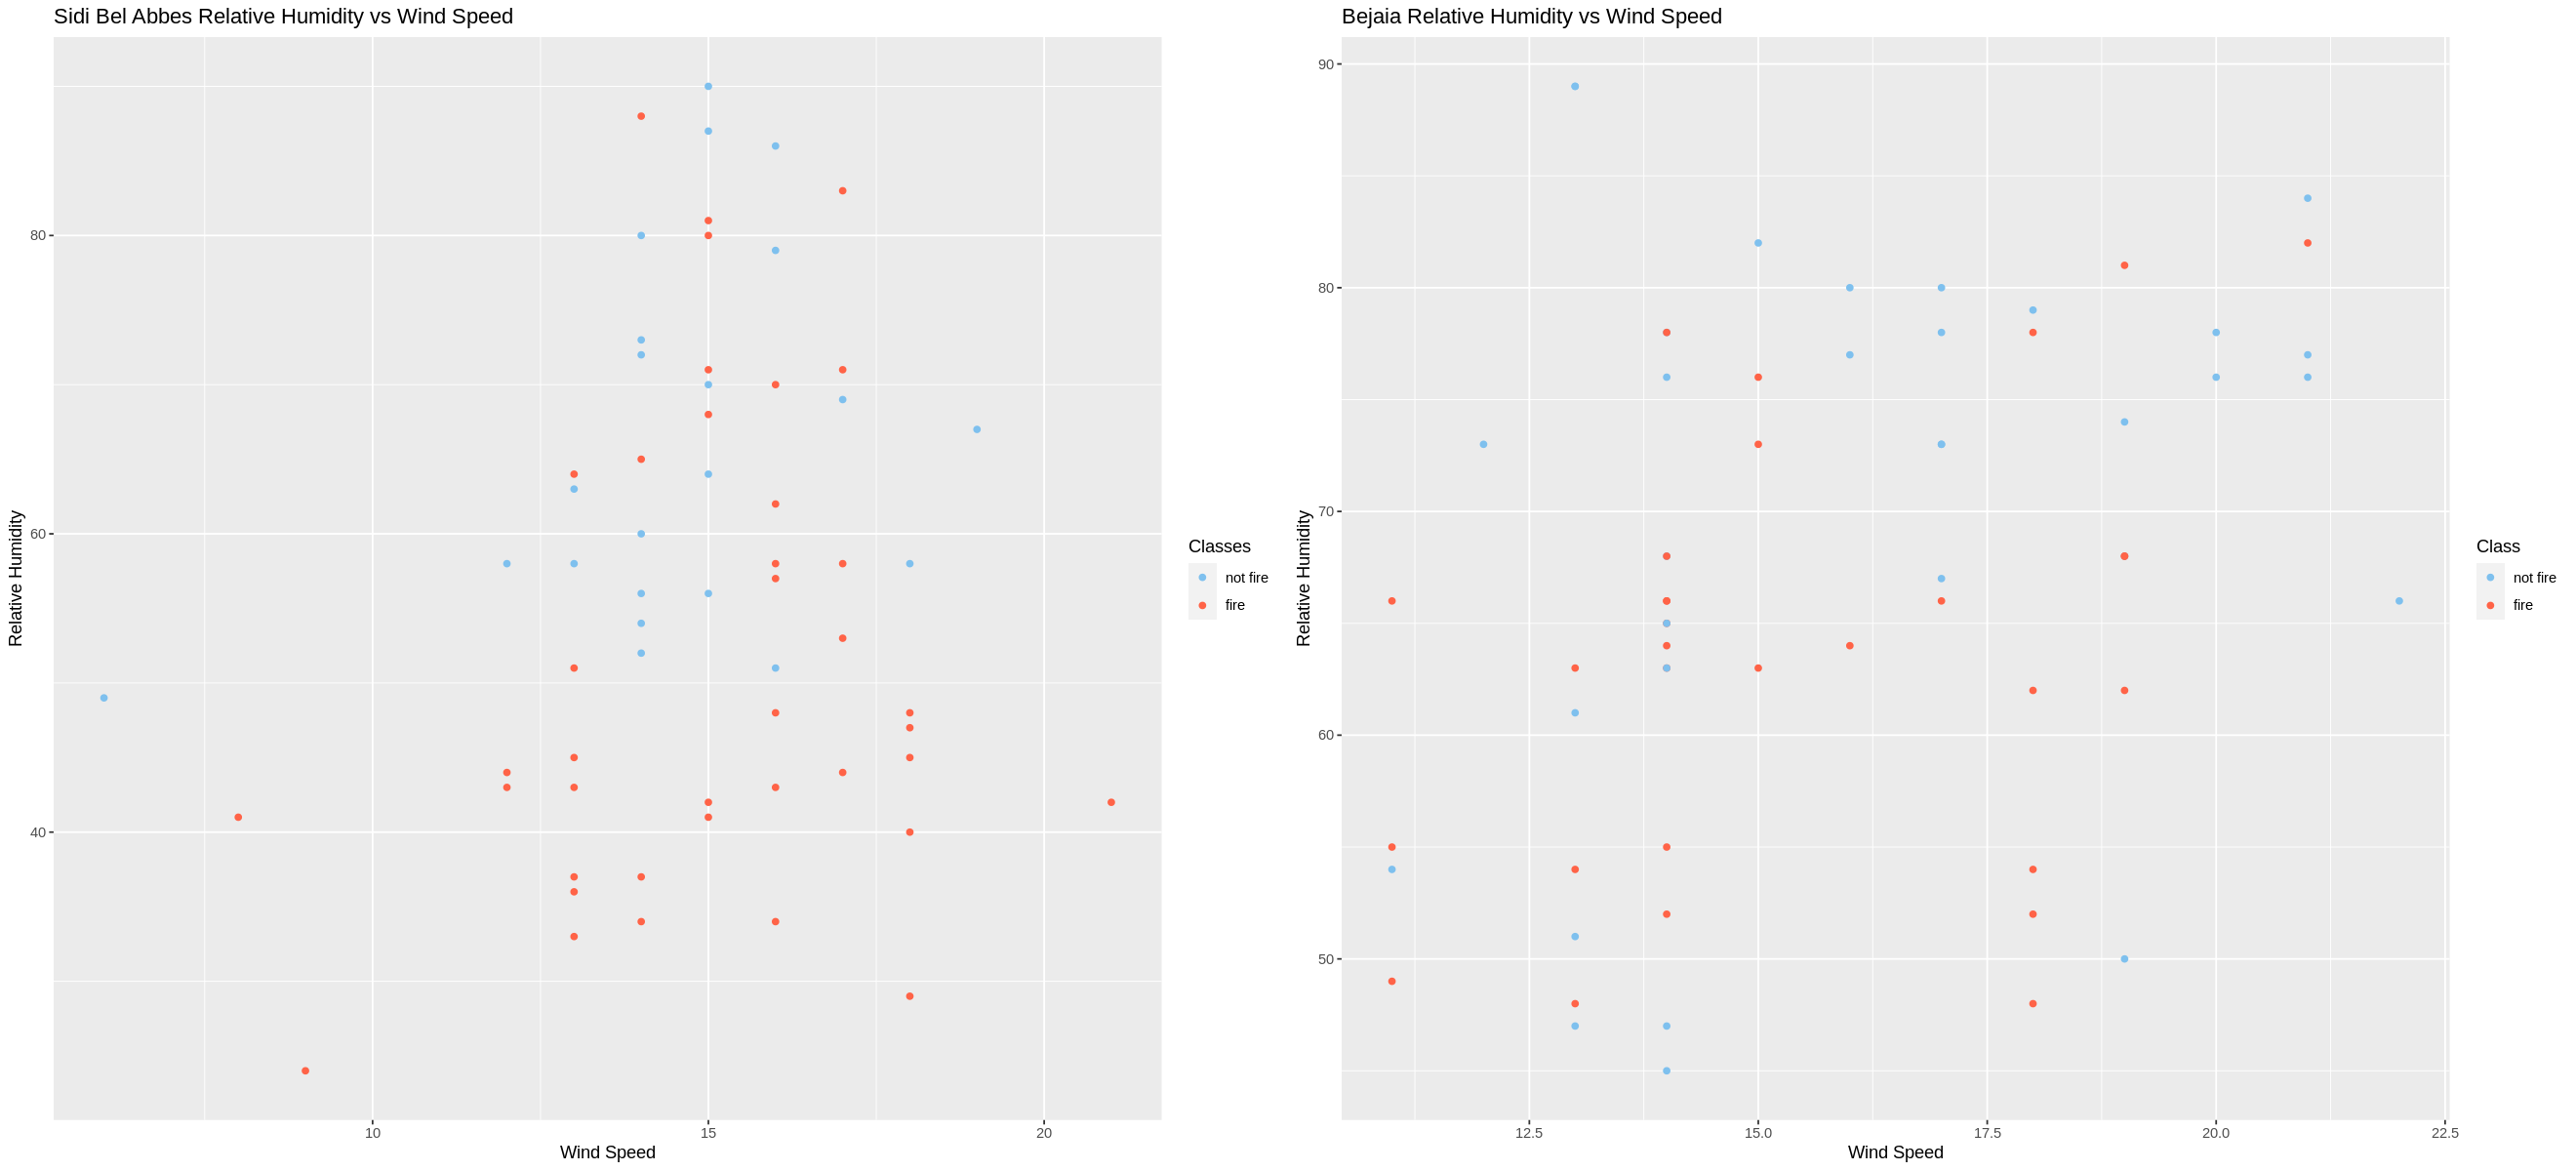

In [296]:
options(repr.plot.width = 22, repr.plot.height = 10)
WS_plots <- plot_grid(Sidi_Bel_Abbes_Ws, Bejaia_Ws)
WS_plots  

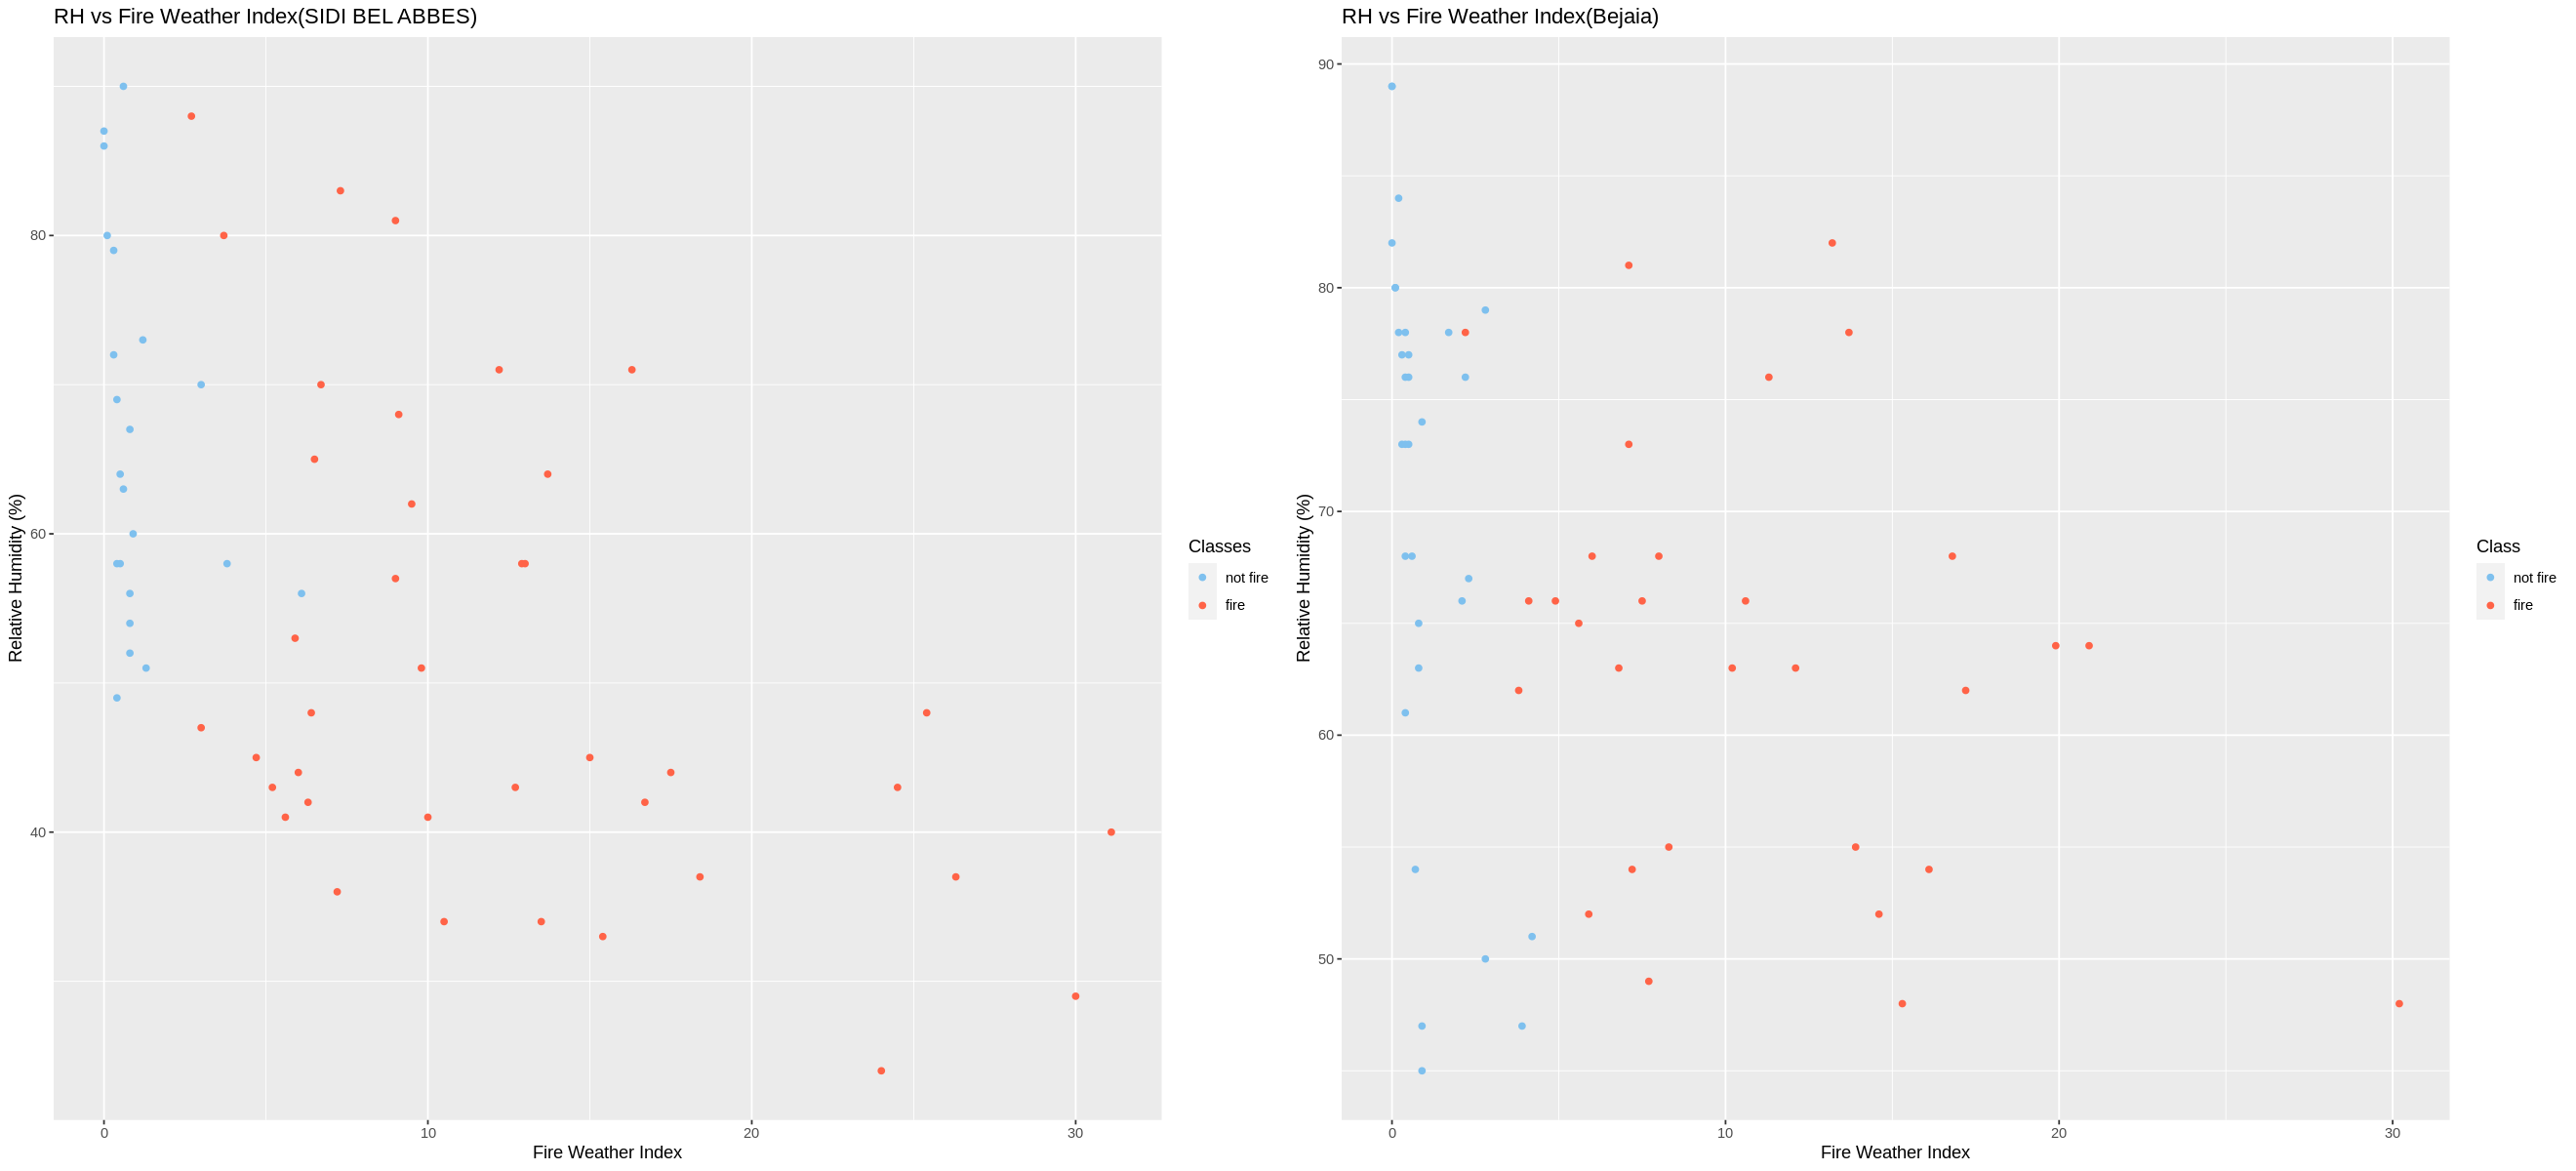

In [297]:
options(repr.plot.width = 22, repr.plot.height = 10)
FWI_plots <- plot_grid(Sidi_Bel_Abbes_RH_FWI, Bejaia_RH_FWI )
FWI_plots

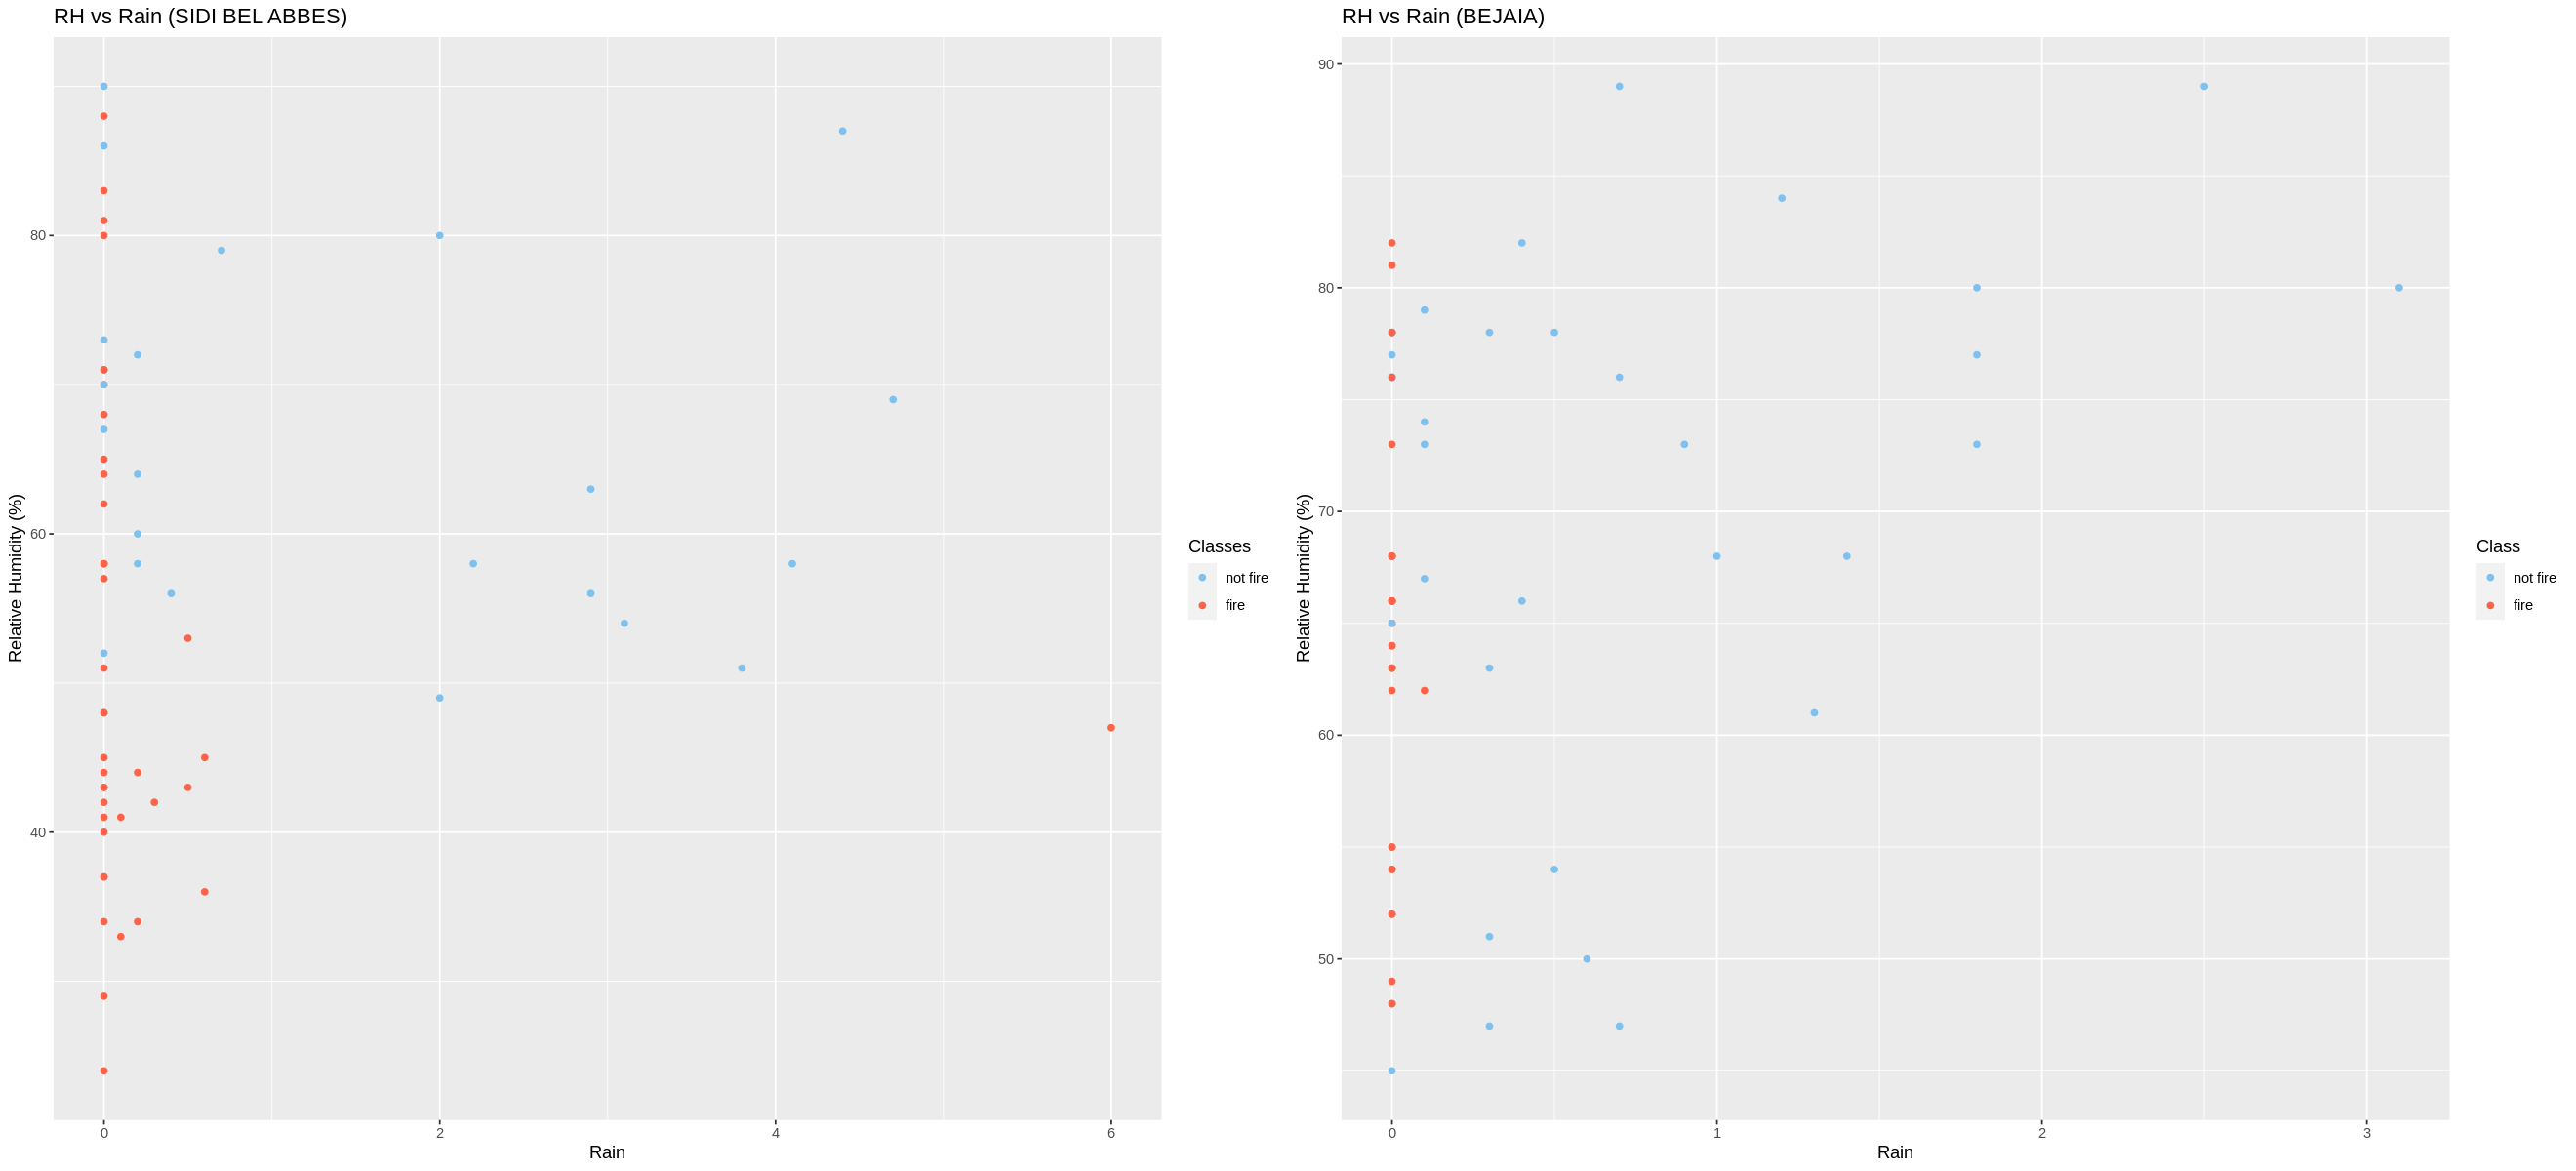

In [298]:
options(repr.plot.width = 22, repr.plot.height = 10)
RAIN_plots <- plot_grid(Sidi_Bel_Abbes_RH_Rain, Bejaia_RH_Rain)
RAIN_plots

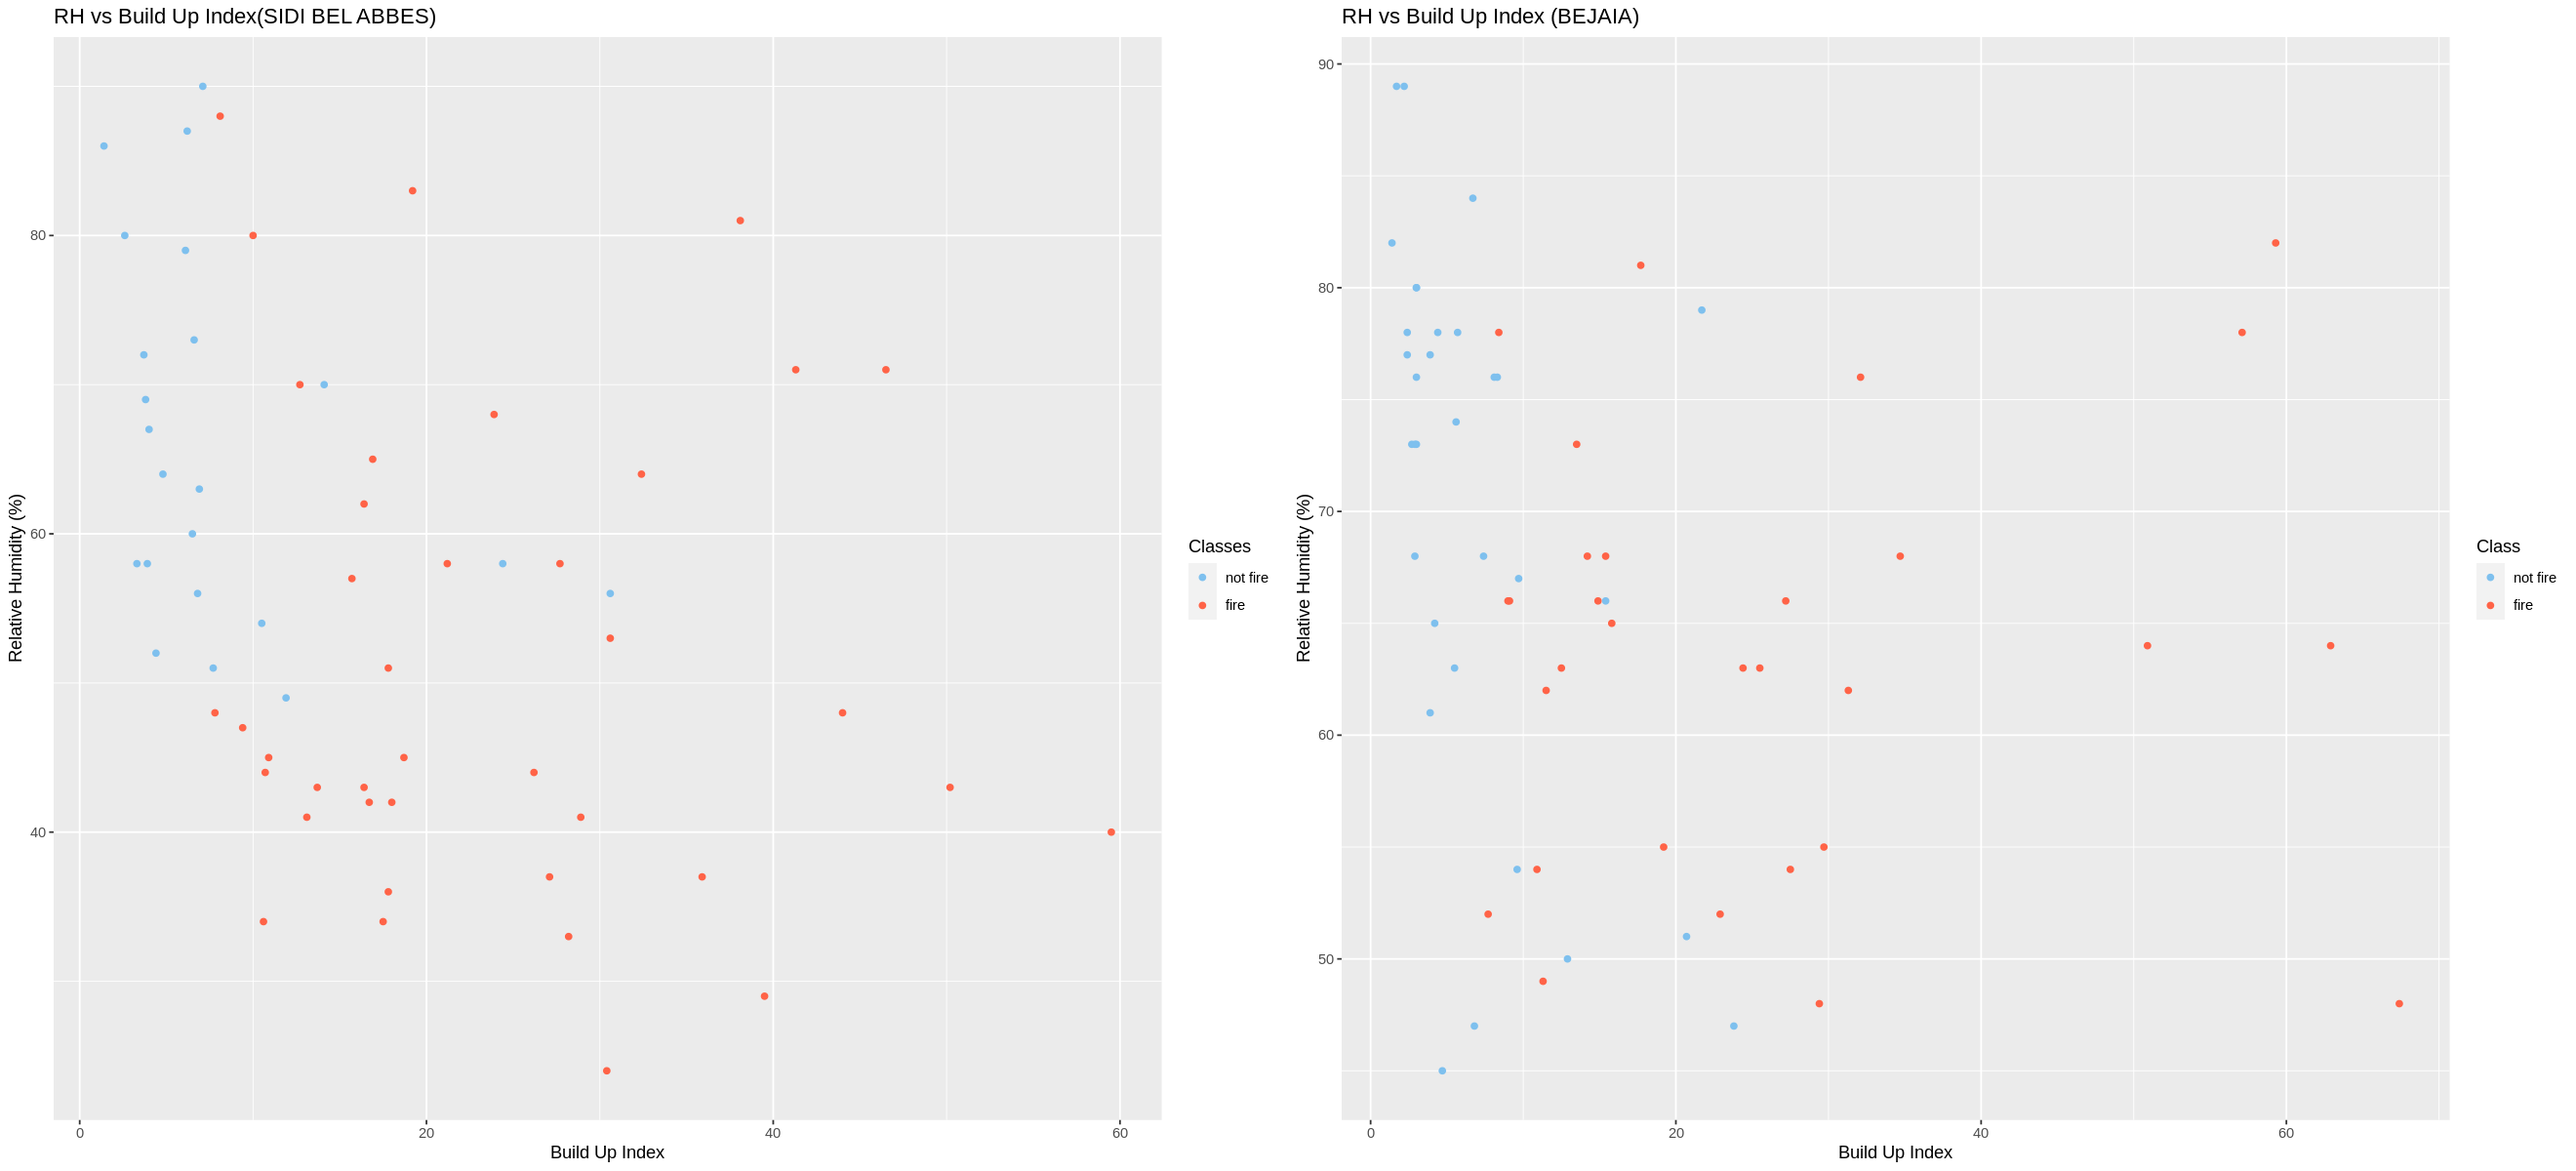

In [299]:
options(repr.plot.width = 22, repr.plot.height = 10)
BUI_plots <- plot_grid(Sidi_Bel_Abbes_RH_BUI,Bejaia_RH_BUI)
BUI_plots

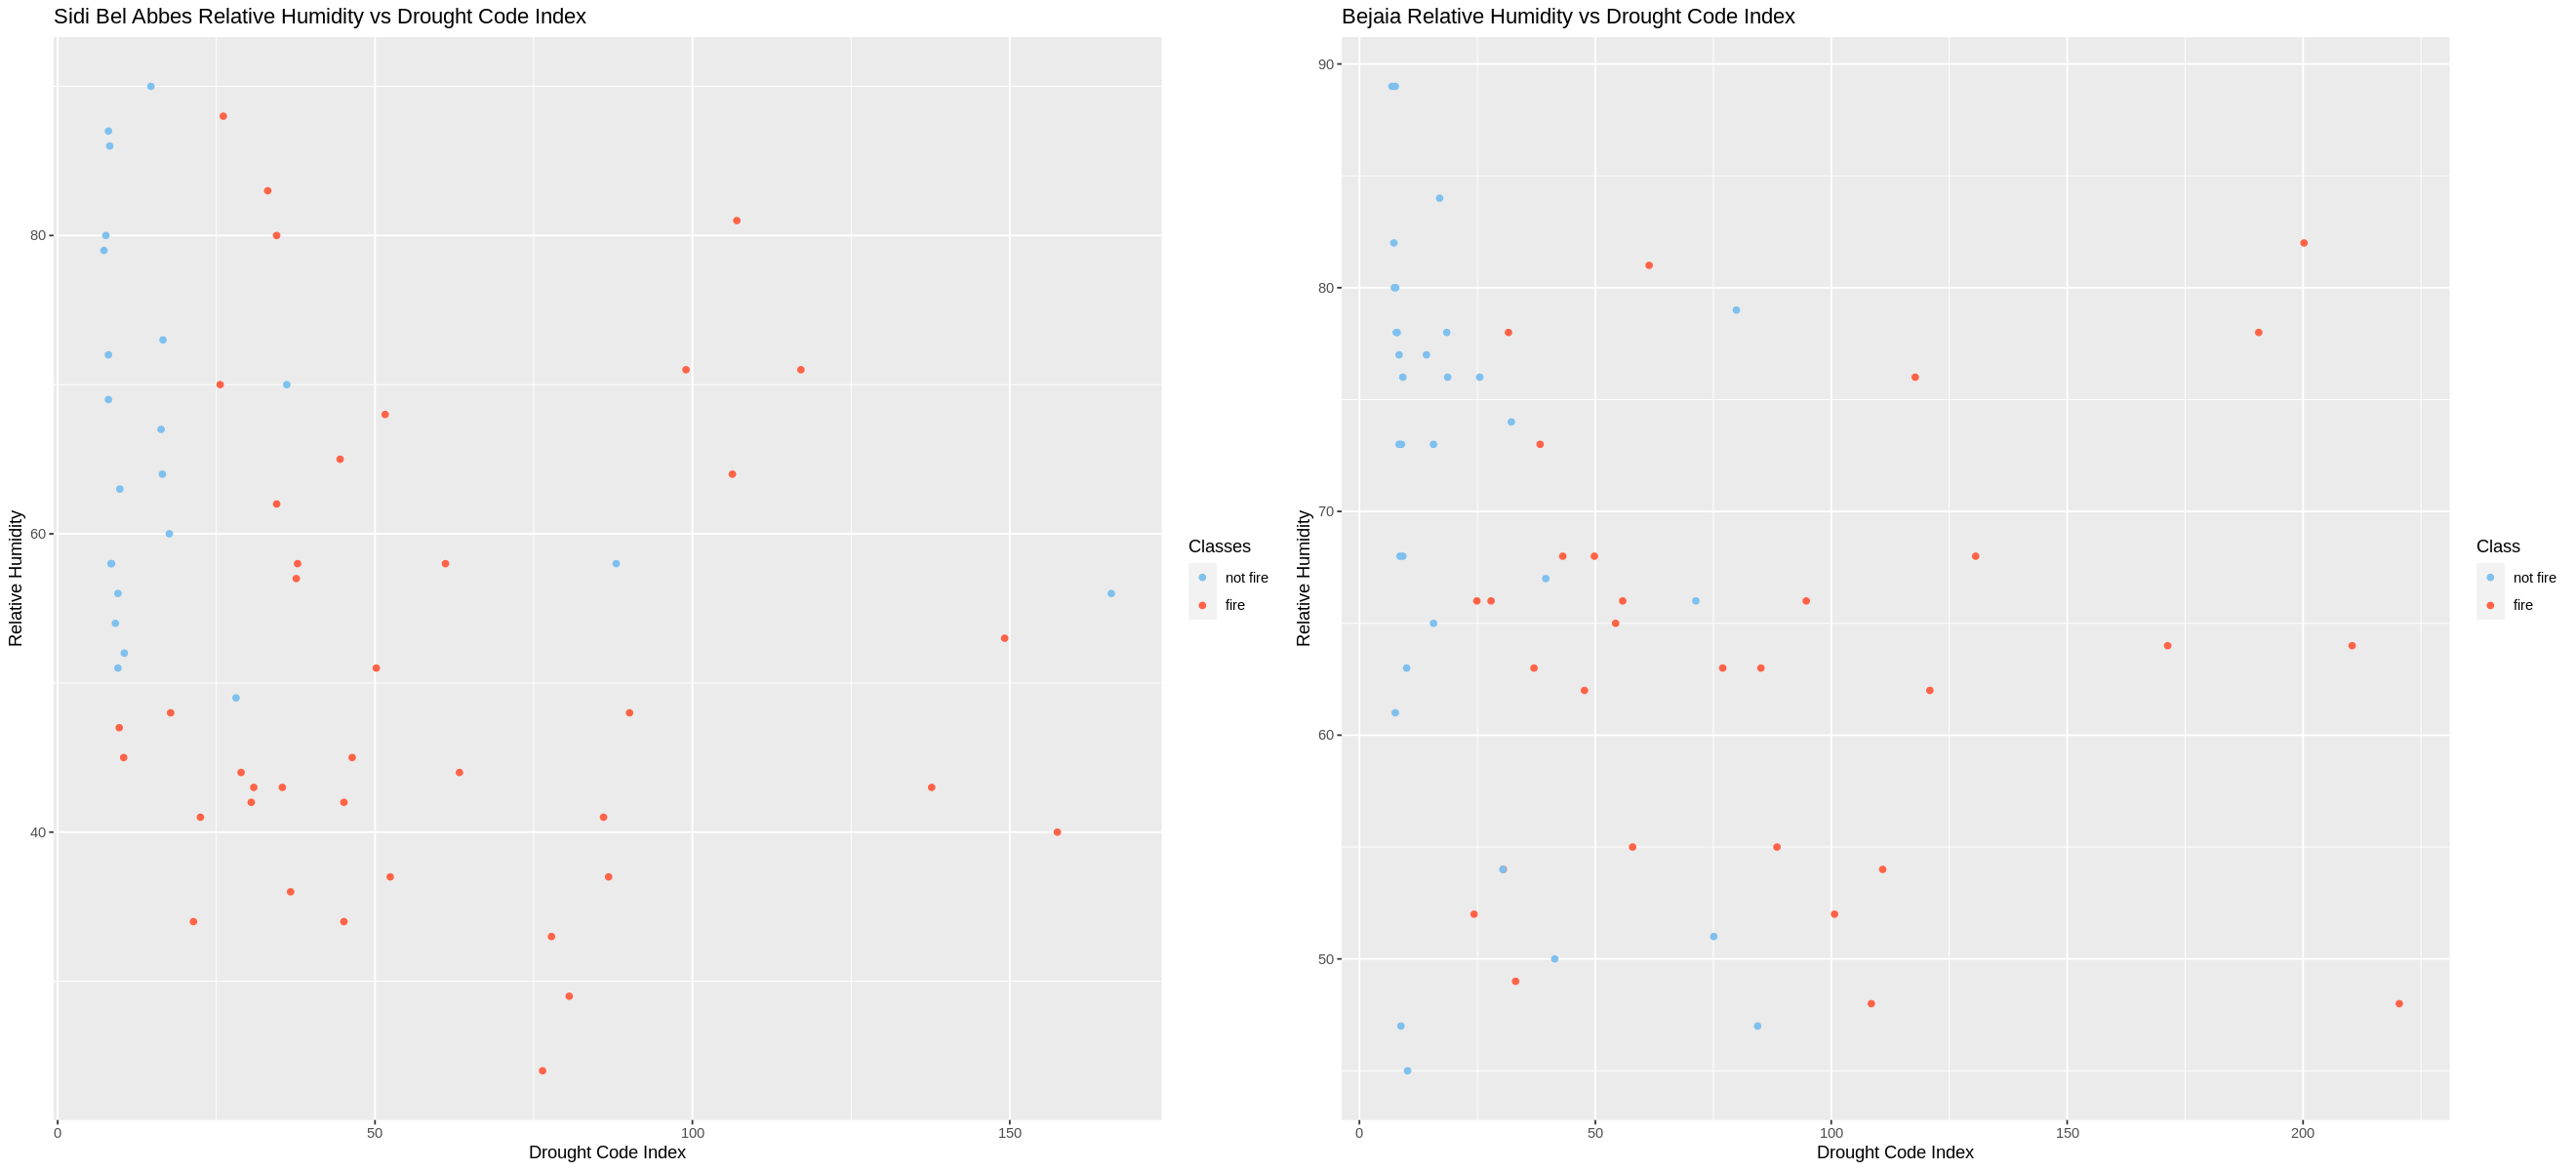

In [300]:
options(repr.plot.width = 22, repr.plot.height = 10)
DC_plots <- plot_grid(Sidi_Bel_Abbes_DC, Bejaia_DC)
DC_plots

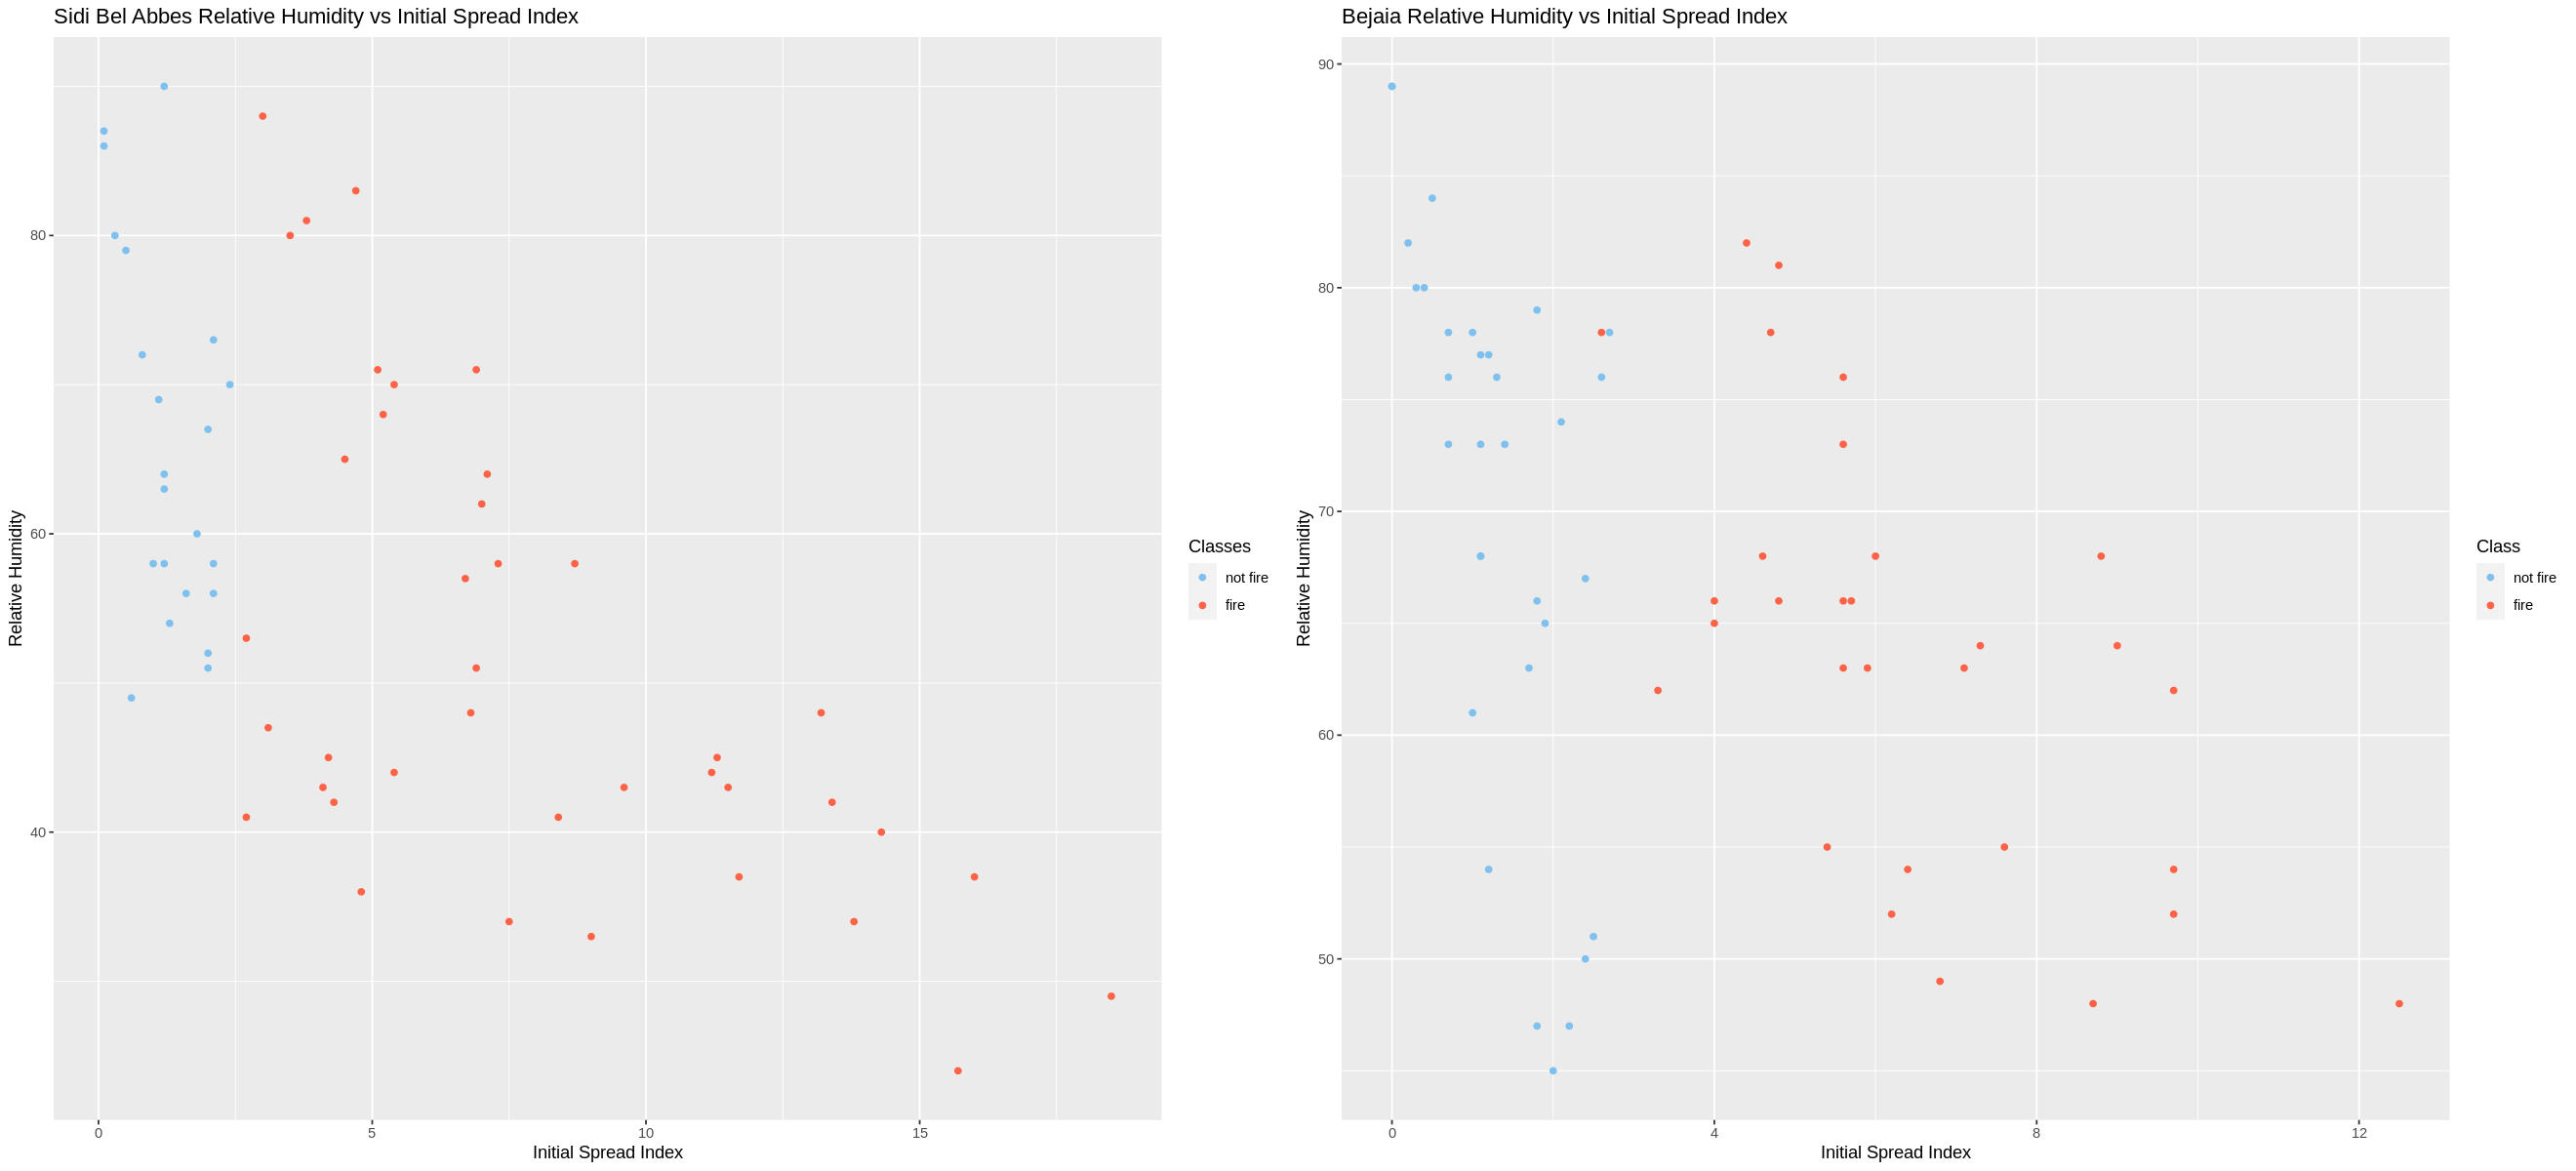

In [301]:
options(repr.plot.width = 22, repr.plot.height = 10)
ISI_plots <- plot_grid(Sidi_Bel_Abbes_ISI, Bejaia_ISI)
ISI_plots

This cell contains the constants needed for classification. These are the folded Bejaia and Sidi Bel Abbes datasets, K nearest neighbor tuning model, and K vals tibble. This cell also contains the seed to ensure reproducibility.

In [302]:
Bej_vfold_C <- vfold_cv(Bejaia_train, v =5 , strata =Class)
Sidi_vfold_C <- vfold_cv(Sidi_Bel_Abbes_train, v =5 , strata =Classes)

knn_spec_tune <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) %>%
  set_engine("kknn") %>%
  set_mode("classification")

k_vals <- tibble(neighbors = seq(from = 1, to = 15, by = 1))

set.seed(1)

This cell contains the scaled recipe for the fine fuel moisture code variable on the Bejaia dataset

In [303]:
Bej_FFMC_recipe_scaled <- recipe(Class ~ FFMC + RH, data=Bejaia_train) %>%
    step_scale(all_predictors()) %>%
    step_center(all_predictors())

The cell below finds the optimal K value for fine fuel moisture code on the Bejaia dataset.

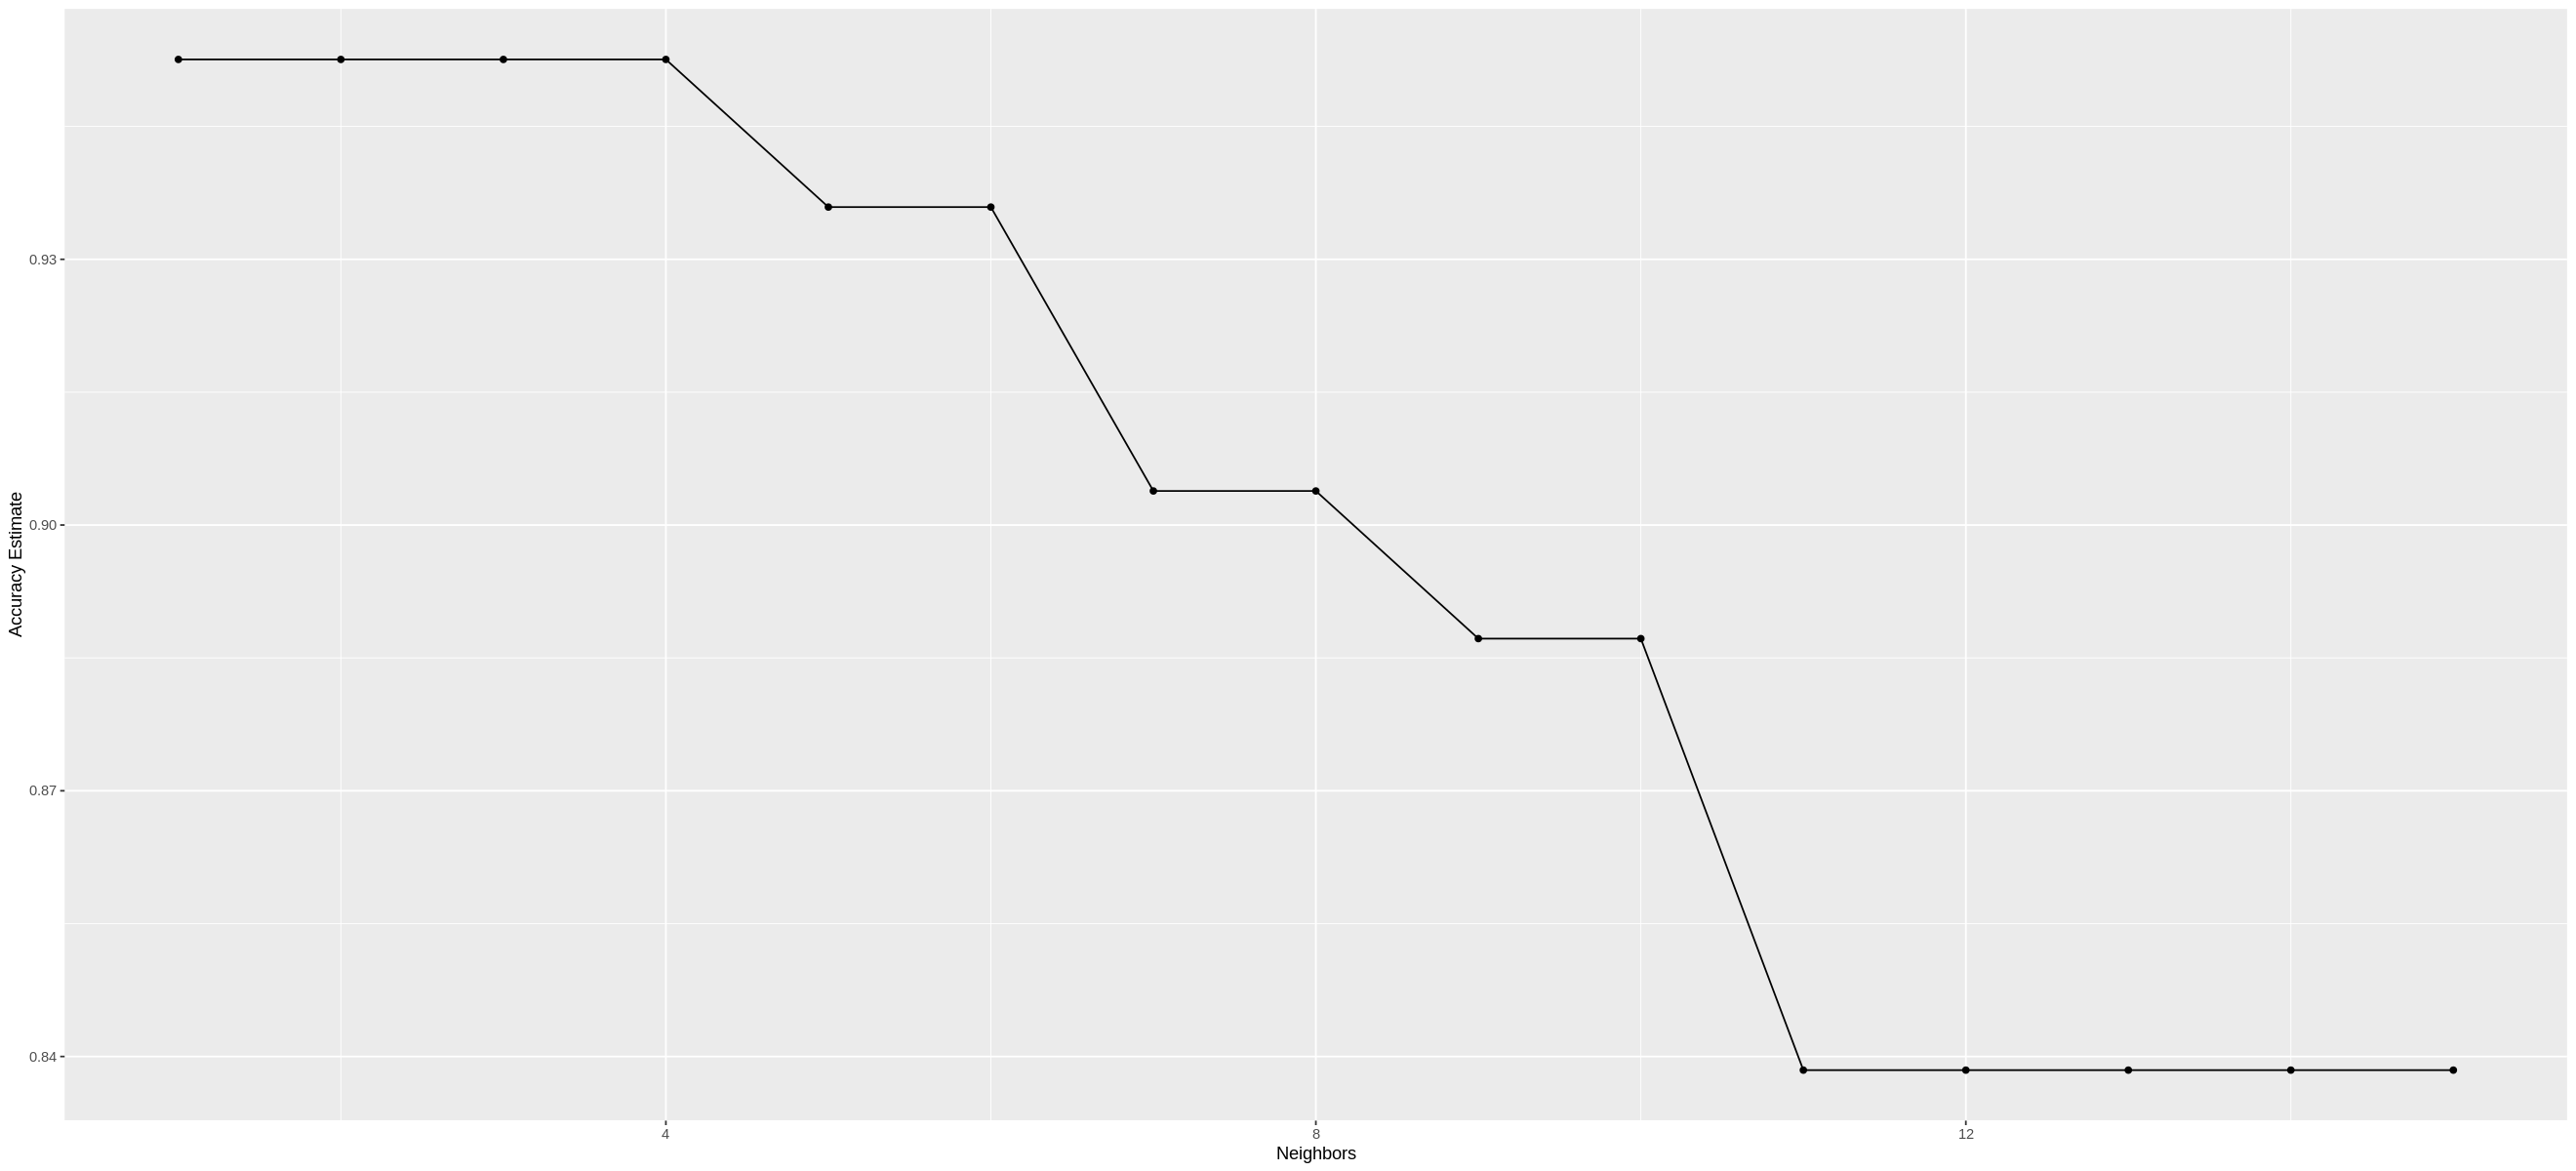

In [304]:
knn_results_tune_Bej_FFMC <- workflow() %>%
  add_recipe(Bej_FFMC_recipe_scaled) %>%
  add_model(knn_spec_tune) %>%
  tune_grid(resamples =Bej_vfold_C , grid = k_vals) %>%
  collect_metrics()

accuracies_bej_FFMC <- knn_results_tune_Bej_FFMC %>%
  filter(.metric == "accuracy")

accuracy_vs_k_Bej_FFMC <- ggplot(accuracies_bej_FFMC, aes(x = neighbors, y = mean)) +
  geom_point() +
  geom_line() +
  labs(x = "Neighbors", y = "Accuracy Estimate")+
  scale_x_continuous()
accuracy_vs_k_Bej_FFMC

From the above graph K values one to four are the predicted optimal values to obtain the highiest accuracy. We chose two because we did not want new points to be determined soley by the closest neighbor.

In [305]:
Bej_knn_spec_FFMC <- nearest_neighbor(weight_func="rectangular", neighbors=2) %>%
    set_engine("kknn") %>%
    set_mode("classification")

Bej_FFMC_Fit_C <- workflow() %>%
    add_recipe(Bej_FFMC_recipe_scaled) %>%
    add_model(Bej_knn_spec_FFMC) %>%
    fit(data=Bejaia_train)


Bej_FFMC_prediction <- predict(Bej_FFMC_Fit_C, Bejaia_test) %>%
    bind_cols(Bejaia_test)

Bej_FFMC_prediction_accuracy <- Bej_FFMC_prediction %>%
    metrics(truth=Class, estimate= .pred_class)
Bej_FFMC_prediction_accuracy

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.9500000
kap,binary,0.8997773


The cell below contains the recipe for FFMC for the Sidi Bel Abbes data set. It also contains the folded Sidi_Bel_Abbes data set

In [306]:
Sidi_FFMC_recipe_scaled <- recipe(Classes ~ FFMC + RH, data=Sidi_Bel_Abbes_train) %>%
    step_scale(all_predictors()) %>%
    step_center(all_predictors())

set.seed(1)


Cell below finds the optimal K value for FFMC for the Sidi Bel Abbes Data set

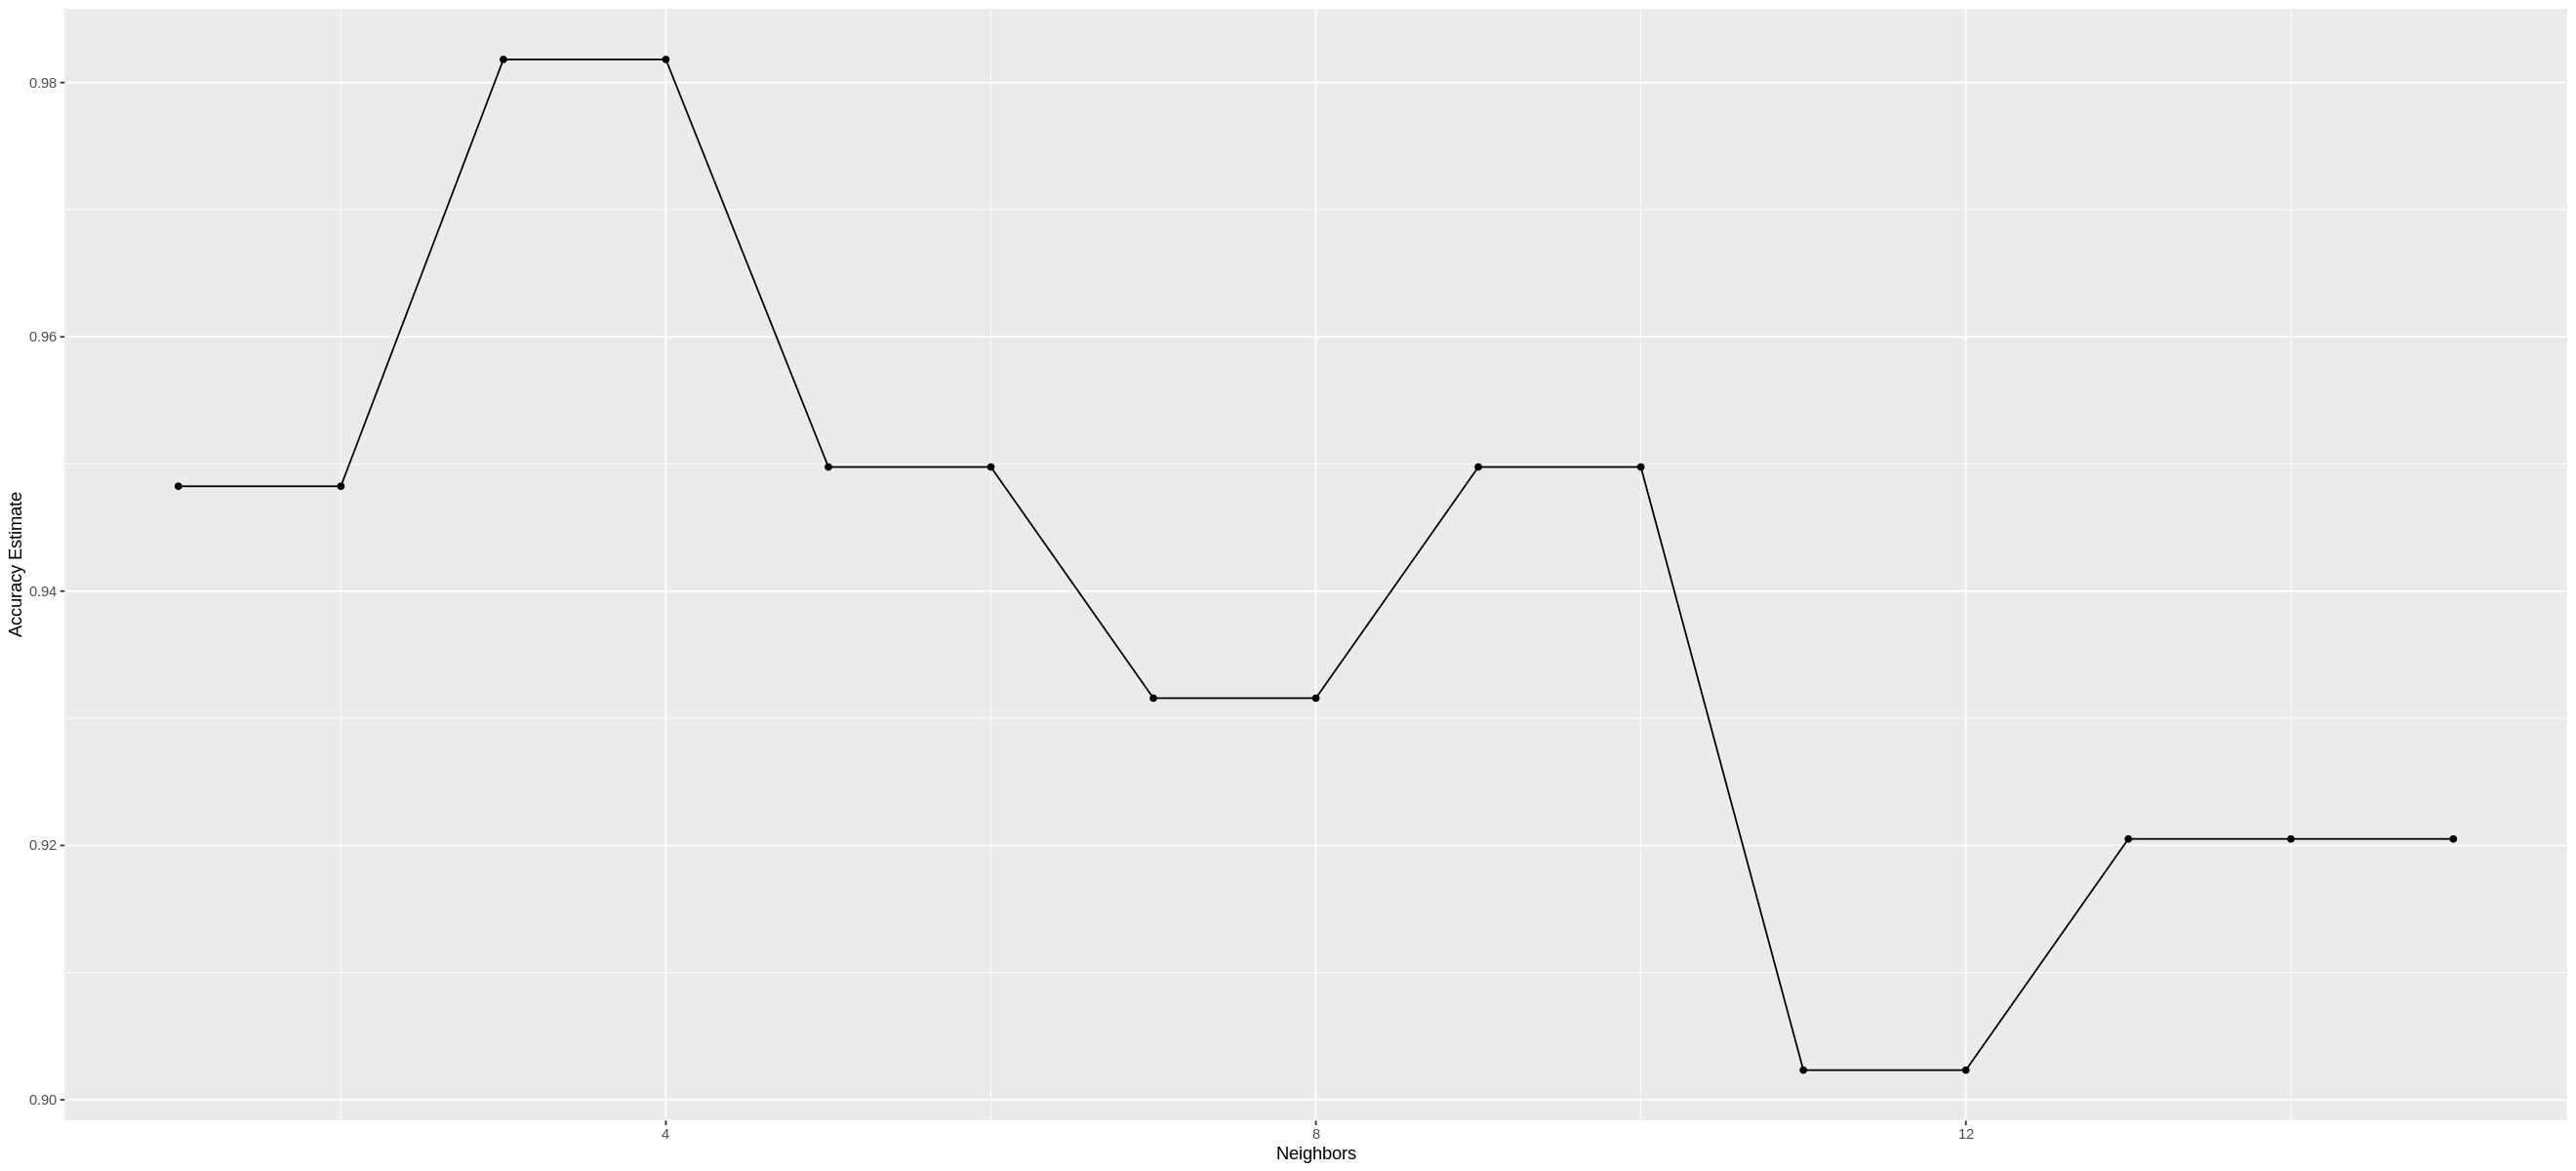

In [307]:
set.seed(1)
knn_results_tune_Sidi_FFMC <- workflow() %>%
  add_recipe(Sidi_FFMC_recipe_scaled) %>%
  add_model(knn_spec_tune) %>%
  tune_grid(resamples =Sidi_vfold_C , grid = k_vals) %>%
  collect_metrics()

accuracies_Sidi_FFMC <- knn_results_tune_Sidi_FFMC %>%
  filter(.metric == "accuracy")

accuracy_vs_k_Sidi_FFMC <- ggplot(accuracies_Sidi_FFMC, aes(x = neighbors, y = mean)) +
  geom_point() +
  geom_line() +
  labs(x = "Neighbors", y = "Accuracy Estimate")+
  scale_x_continuous()

accuracy_vs_k_Sidi_FFMC

Using the optimal K value calculate the accuracy of the classification model for FFMC on the Sidi Bel Abbes test data

In [308]:
set.seed(1)
Sidi_knn_spec_FFMC <- nearest_neighbor(weight_func="rectangular", neighbors=3) %>%
    set_engine("kknn") %>%
    set_mode("classification")

Sidi_FFMC_Fit_C <- workflow() %>%
    add_recipe(Sidi_FFMC_recipe_scaled) %>%
    add_model(Sidi_knn_spec_FFMC) %>%
    fit(data=Sidi_Bel_Abbes_train)



Sidi_FFMC_prediction <- predict(Sidi_FFMC_Fit_C, Sidi_Bel_Abbes_test) %>%
    bind_cols(Sidi_Bel_Abbes_test)


Sidi_FFMC_prediction_accuracy <- Sidi_FFMC_prediction %>%
    metrics(truth=Classes, estimate= .pred_class)
Sidi_FFMC_prediction_accuracy




.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.9500000
kap,binary,0.8888889


Cell below contains the recipe for DMC for the Bejaia dataset 

Finds the optimal K value for DMC on the Bejaia dataset

Using the optimal K value the accuracy is measured for DMC on the Bejaia test data

The cell below contains the recipe for DMC on the Sidi Bel Abbes data set

The cell below find the optimal k to use for DMC on the Sidi Bel Abbes dataset

Using the optimal K value find the accuracy of DMC on the Sidi Bel Abbes dataset

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.8166667
kap,binary,0.6341463


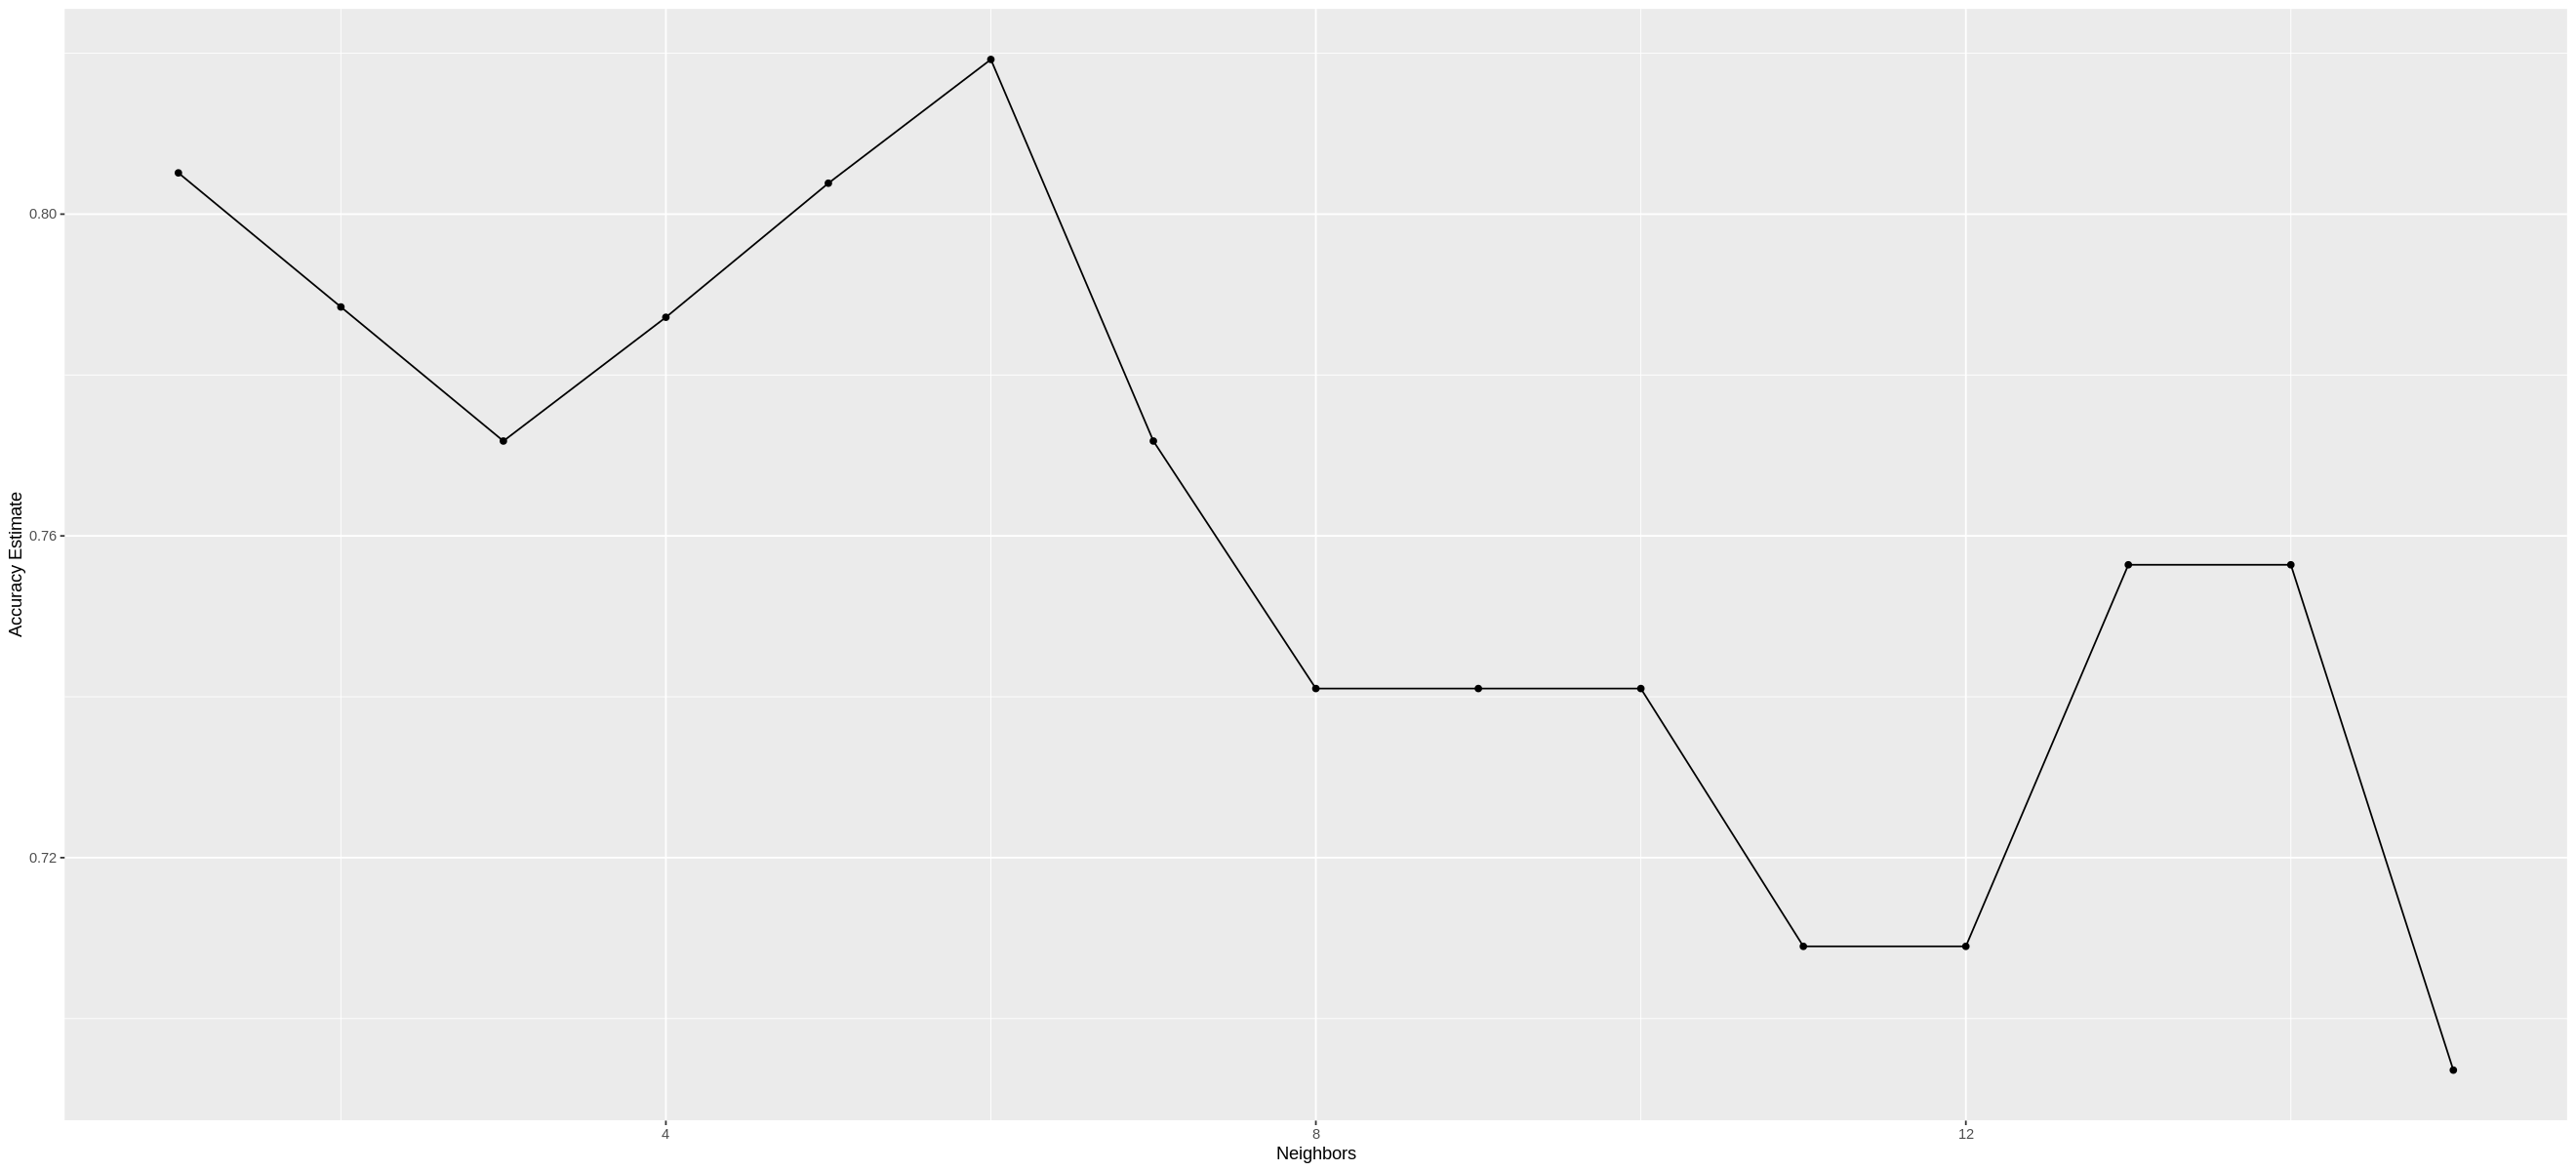

In [309]:
Bej_Rain_recipe_scaled <- recipe(Class ~ Rain + RH, data=Bejaia_train) %>%
    step_scale(all_predictors()) %>%
    step_center(all_predictors())

Bej_knn_spec_rain <- nearest_neighbor(weight_func="rectangular", neighbors=5) %>%
    set_engine("kknn") %>%
    set_mode("classification")

Bej_Rain_Fit <- workflow() %>%
    add_recipe(Bej_Rain_recipe_scaled) %>%
    add_model(Bej_knn_spec_rain) %>%
    fit(data=Bejaia_train)

Bej_vfold_Rain_C <- vfold_cv(Bejaia_train, v =5 , strata =Class)

knn_spec_tune_Bej_rain <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) %>%
  set_engine("kknn") %>%
  set_mode("classification")

k_vals_Bej_rain <- tibble(neighbors = seq(from = 1, to = 15, by = 1))

knn_results_tune <- workflow() %>%
  add_recipe(Bej_Rain_recipe_scaled) %>%
  add_model(knn_spec_tune_Bej_rain) %>%
  tune_grid(resamples =Bej_vfold_Rain_C , grid = k_vals_Bej_rain) %>%
  collect_metrics()
#knn_results_tune

accuracies_bej_Rain <- knn_results_tune %>%
  filter(.metric == "accuracy")

accuracy_vs_k <- ggplot(accuracies_bej_Rain, aes(x = neighbors, y = mean)) +
  geom_point() +
  geom_line() +
  labs(x = "Neighbors", y = "Accuracy Estimate")+
  scale_x_continuous()
accuracy_vs_k

Bej_Rain_prediction <- predict(Bej_Rain_Fit, Bejaia_test) %>%
    bind_cols(Bejaia_test)

Bej_Rain_prediction_accuracy <- Bej_Rain_prediction %>%
    metrics(truth=Class, estimate= .pred_class)
Bej_Rain_prediction_accuracy


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.9333333
kap,binary,0.8665184


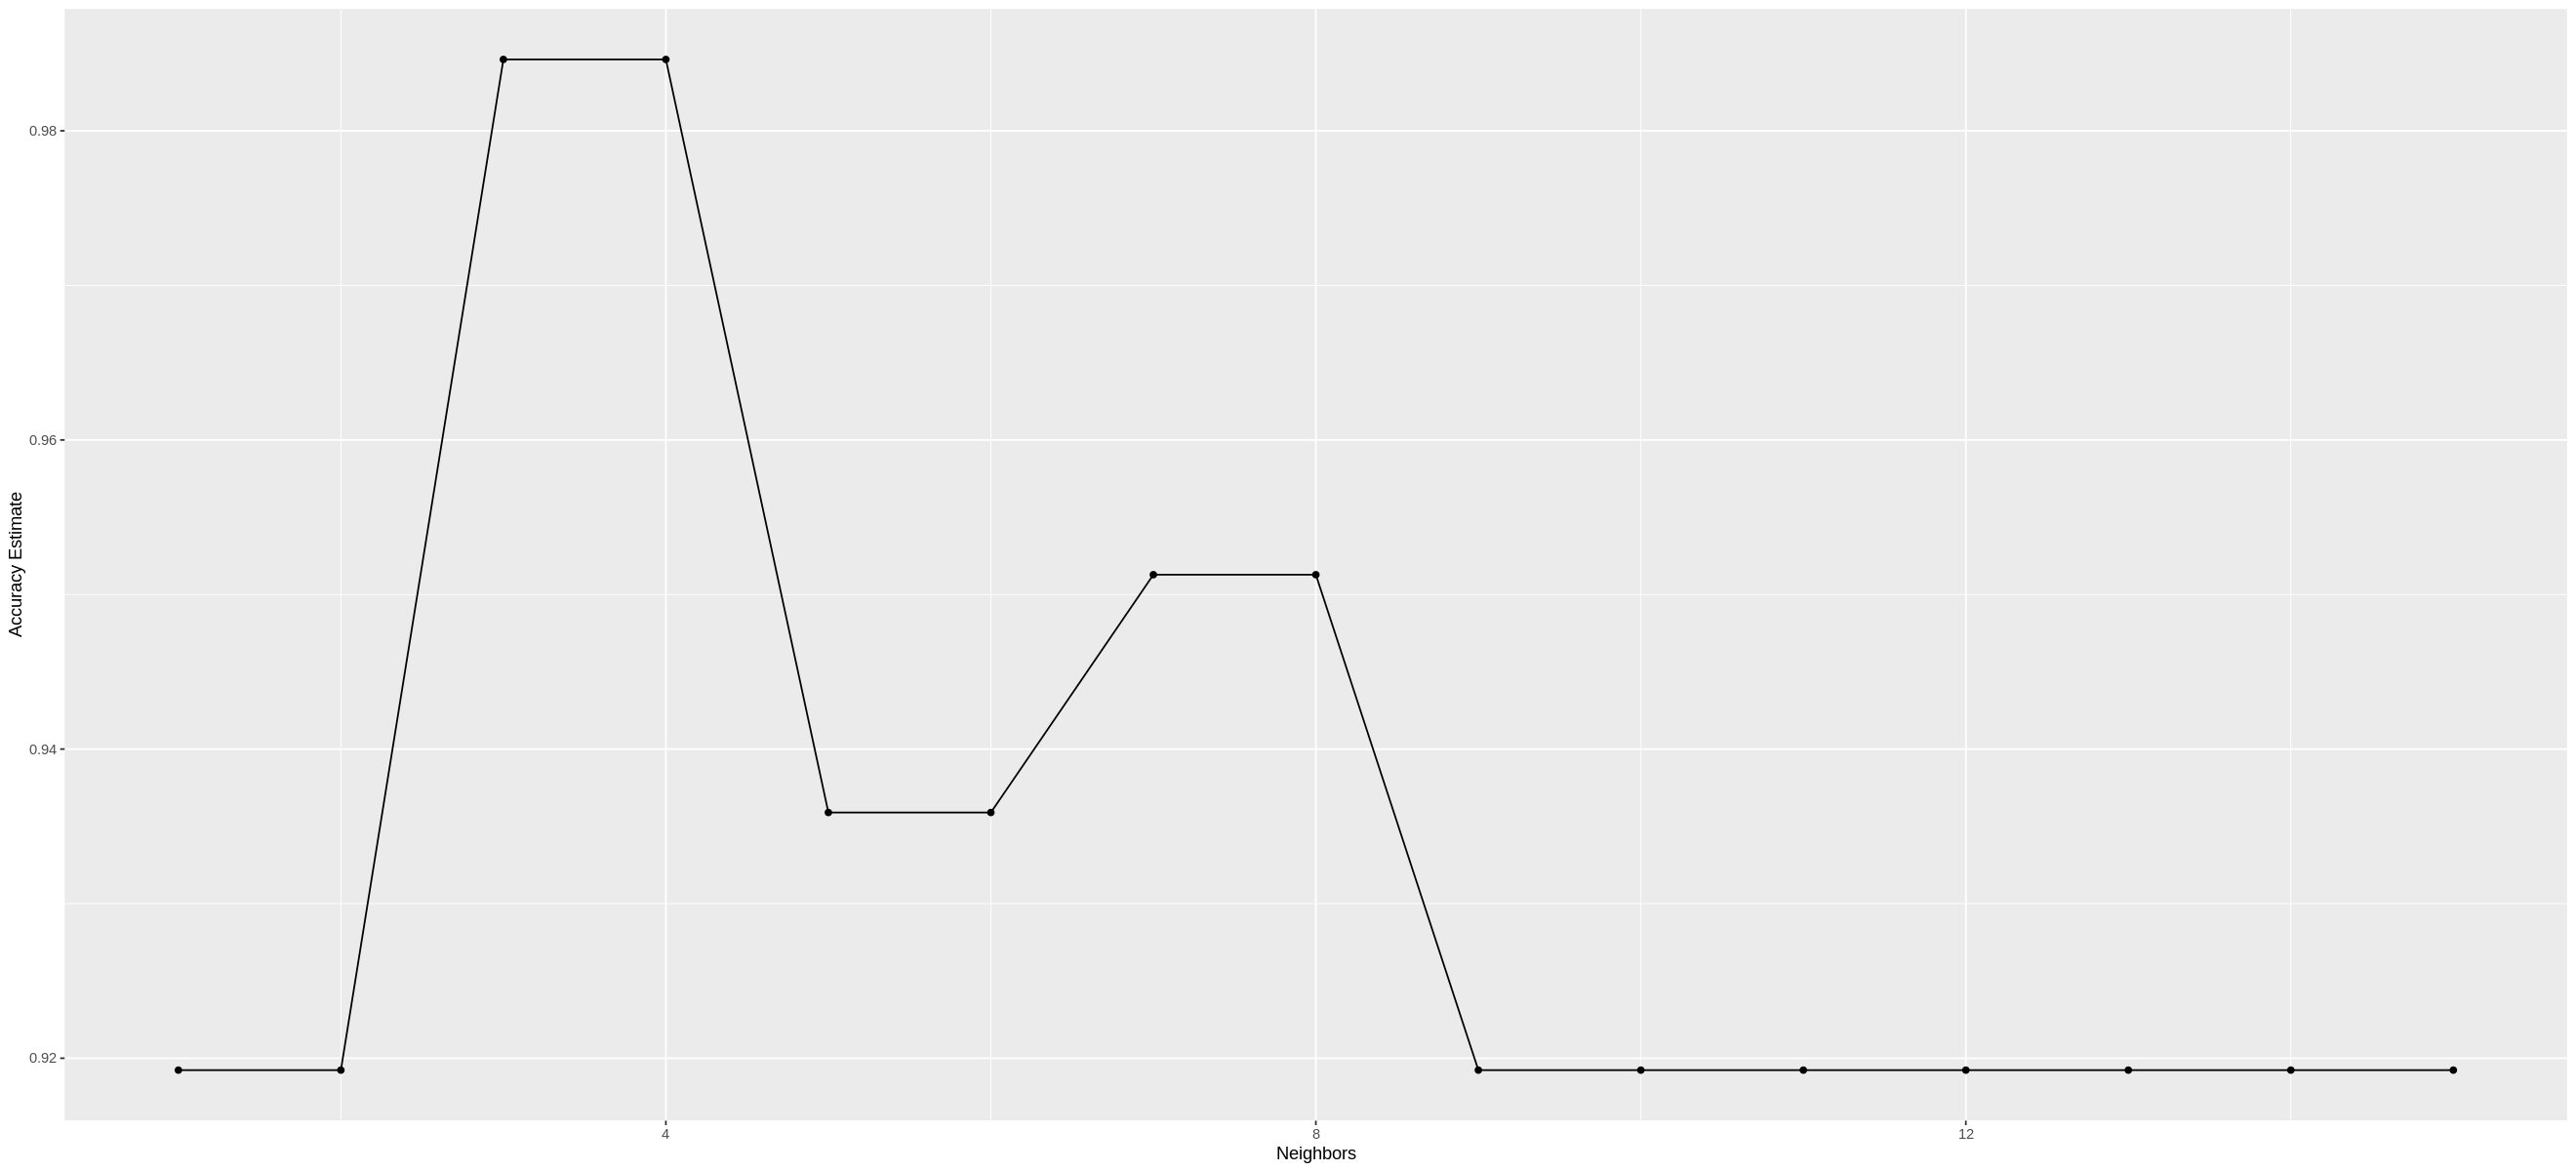

In [310]:
Bej_FWI_recipe_scaled <- recipe(Class ~ FWI + RH, data=Bejaia_train) %>%
    step_scale(all_predictors()) %>%
    step_center(all_predictors())

Bej_knn_spec_C <- nearest_neighbor(weight_func="rectangular", neighbors=3) %>%
    set_engine("kknn") %>%
    set_mode("classification")

Bej_FWI_Fit_C <- workflow() %>%
    add_recipe(Bej_FWI_recipe_scaled) %>%
    add_model(Bej_knn_spec_C) %>%
    fit(data=Bejaia_train)

Bej_vfold_FWI_C <- vfold_cv(Bejaia_train, v =5 , strata =Class)

knn_spec_tune <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) %>%
  set_engine("kknn") %>%
  set_mode("classification")

k_vals <- tibble(neighbors = seq(from = 1, to = 15, by = 1))

knn_results_tune <- workflow() %>%
  add_recipe(Bej_FWI_recipe_scaled) %>%
  add_model(knn_spec_tune) %>%
  tune_grid(resamples =Bej_vfold_FWI_C , grid = k_vals) %>%
  collect_metrics()
#knn_results_tune

accuracies_bej_FWI <- knn_results_tune %>%
  filter(.metric == "accuracy")

accuracy_vs_k <- ggplot(accuracies_bej_FWI, aes(x = neighbors, y = mean)) +
  geom_point() +
  geom_line() +
  labs(x = "Neighbors", y = "Accuracy Estimate")+
  scale_x_continuous()
accuracy_vs_k

Bej_FWI_prediction <- predict(Bej_FWI_Fit_C, Bejaia_test) %>%
    bind_cols(Bejaia_test)
Bej_FWI_prediction_accuracy <- Bej_FWI_prediction %>%
    metrics(truth=Class, estimate= .pred_class)
Bej_FWI_prediction_accuracy


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.8000000
kap,binary,0.5180723


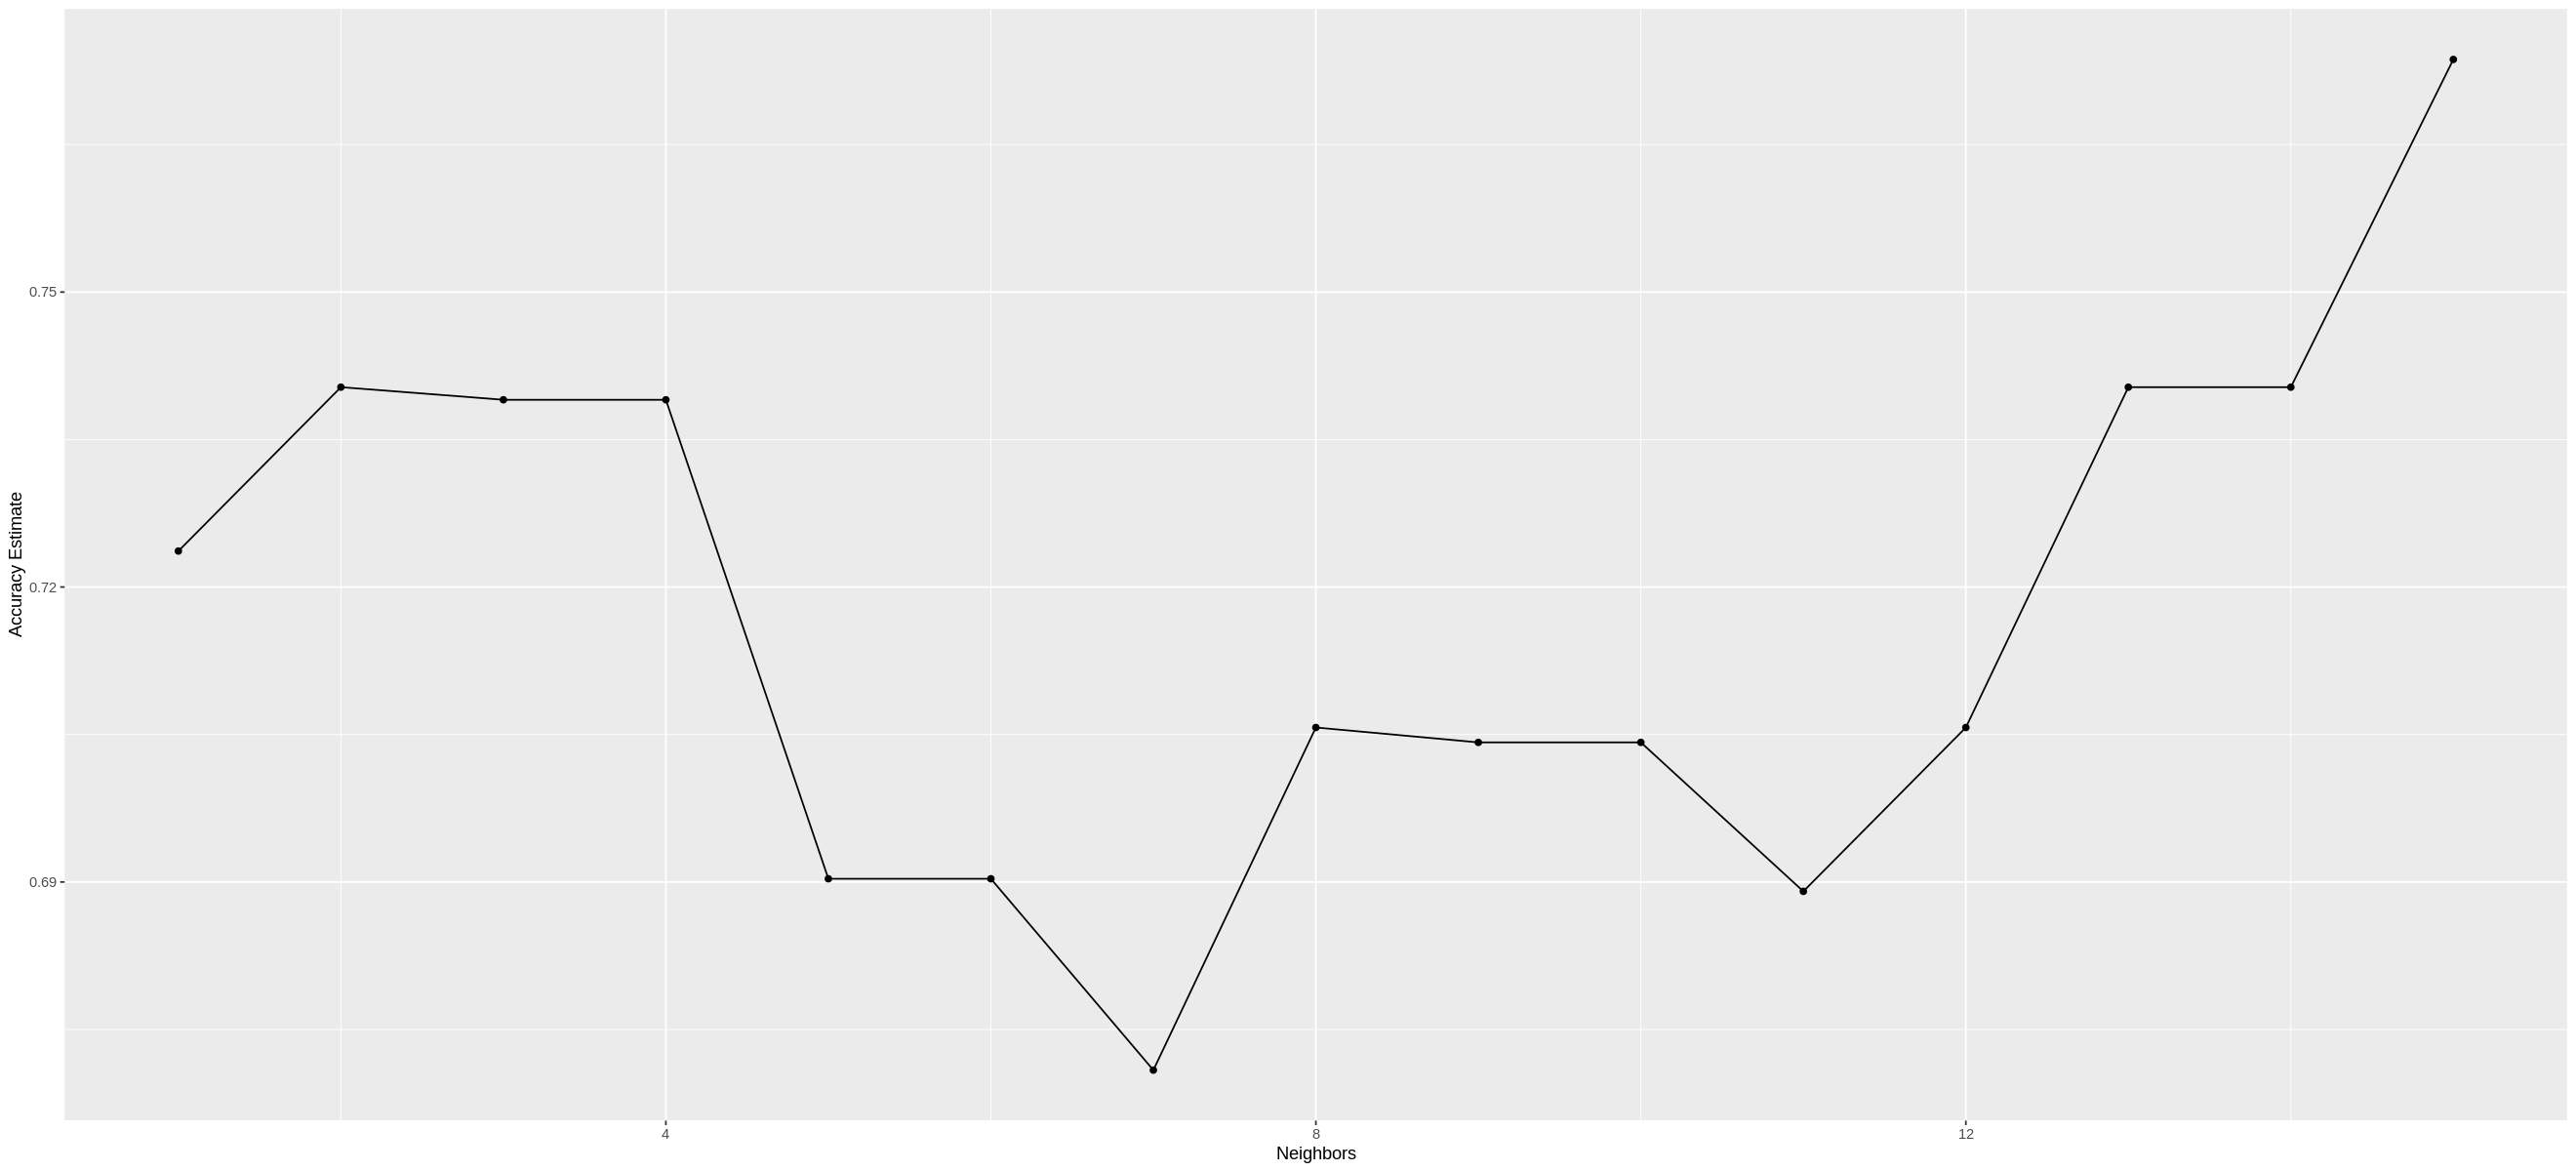

In [311]:
SBA_Rain_recipe_scaled <- recipe(Classes ~ Rain + RH, data=Sidi_Bel_Abbes_train) %>%
    step_scale(all_predictors()) %>%
    step_center(all_predictors())

SBA_knn_spec_C <- nearest_neighbor(weight_func="rectangular", neighbors=5) %>%
    set_engine("kknn") %>%
    set_mode("classification")

SBA_Rain_Fit_C <- workflow() %>%
    add_recipe(SBA_Rain_recipe_scaled) %>%
    add_model(SBA_knn_spec_C) %>%
    fit(data=Sidi_Bel_Abbes_train)

SBA_vfold_Rain_C <- vfold_cv(Sidi_Bel_Abbes_train, v =5 , strata =Classes)

knn_spec_tune <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) %>%
  set_engine("kknn") %>%
  set_mode("classification")

k_vals <- tibble(neighbors = seq(from = 1, to = 15, by = 1))

knn_results_tune_SBA_Rain <- workflow() %>%
  add_recipe(SBA_Rain_recipe_scaled) %>%
  add_model(knn_spec_tune) %>%
  tune_grid(resamples =SBA_vfold_Rain_C , grid = k_vals) %>%
  collect_metrics()
#knn_results_tune

accuracies_SBA_Rain <- knn_results_tune_SBA_Rain %>%
  filter(.metric == "accuracy")

accuracy_vs_k <- ggplot(accuracies_SBA_Rain, aes(x = neighbors, y = mean)) +
  geom_point() +
  geom_line() +
  labs(x = "Neighbors", y = "Accuracy Estimate")+
  scale_x_continuous()
accuracy_vs_k

SBA_Rain_prediction <- predict(SBA_Rain_Fit_C, Sidi_Bel_Abbes_test) %>%
    bind_cols(Sidi_Bel_Abbes_test)
SBA_Rain_prediction_accuracy <- SBA_Rain_prediction %>%
    metrics(truth=Classes, estimate= .pred_class)
SBA_Rain_prediction_accuracy



neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,binary,0.9331002,5,0.031290179,Model01
1,roc_auc,binary,0.9375000,5,0.027950850,Model01
2,accuracy,binary,0.9331002,5,0.031290179,Model02
2,roc_auc,binary,0.9750000,5,0.025000000,Model02
3,accuracy,binary,0.9318182,5,0.031418851,Model03
3,roc_auc,binary,0.9718750,5,0.024407030,Model03
4,accuracy,binary,0.9318182,5,0.031418851,Model04
4,roc_auc,binary,0.9714286,5,0.024353896,Model04
5,accuracy,binary,0.9318182,5,0.048744570,Model05


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.9000000
kap,binary,0.7894737


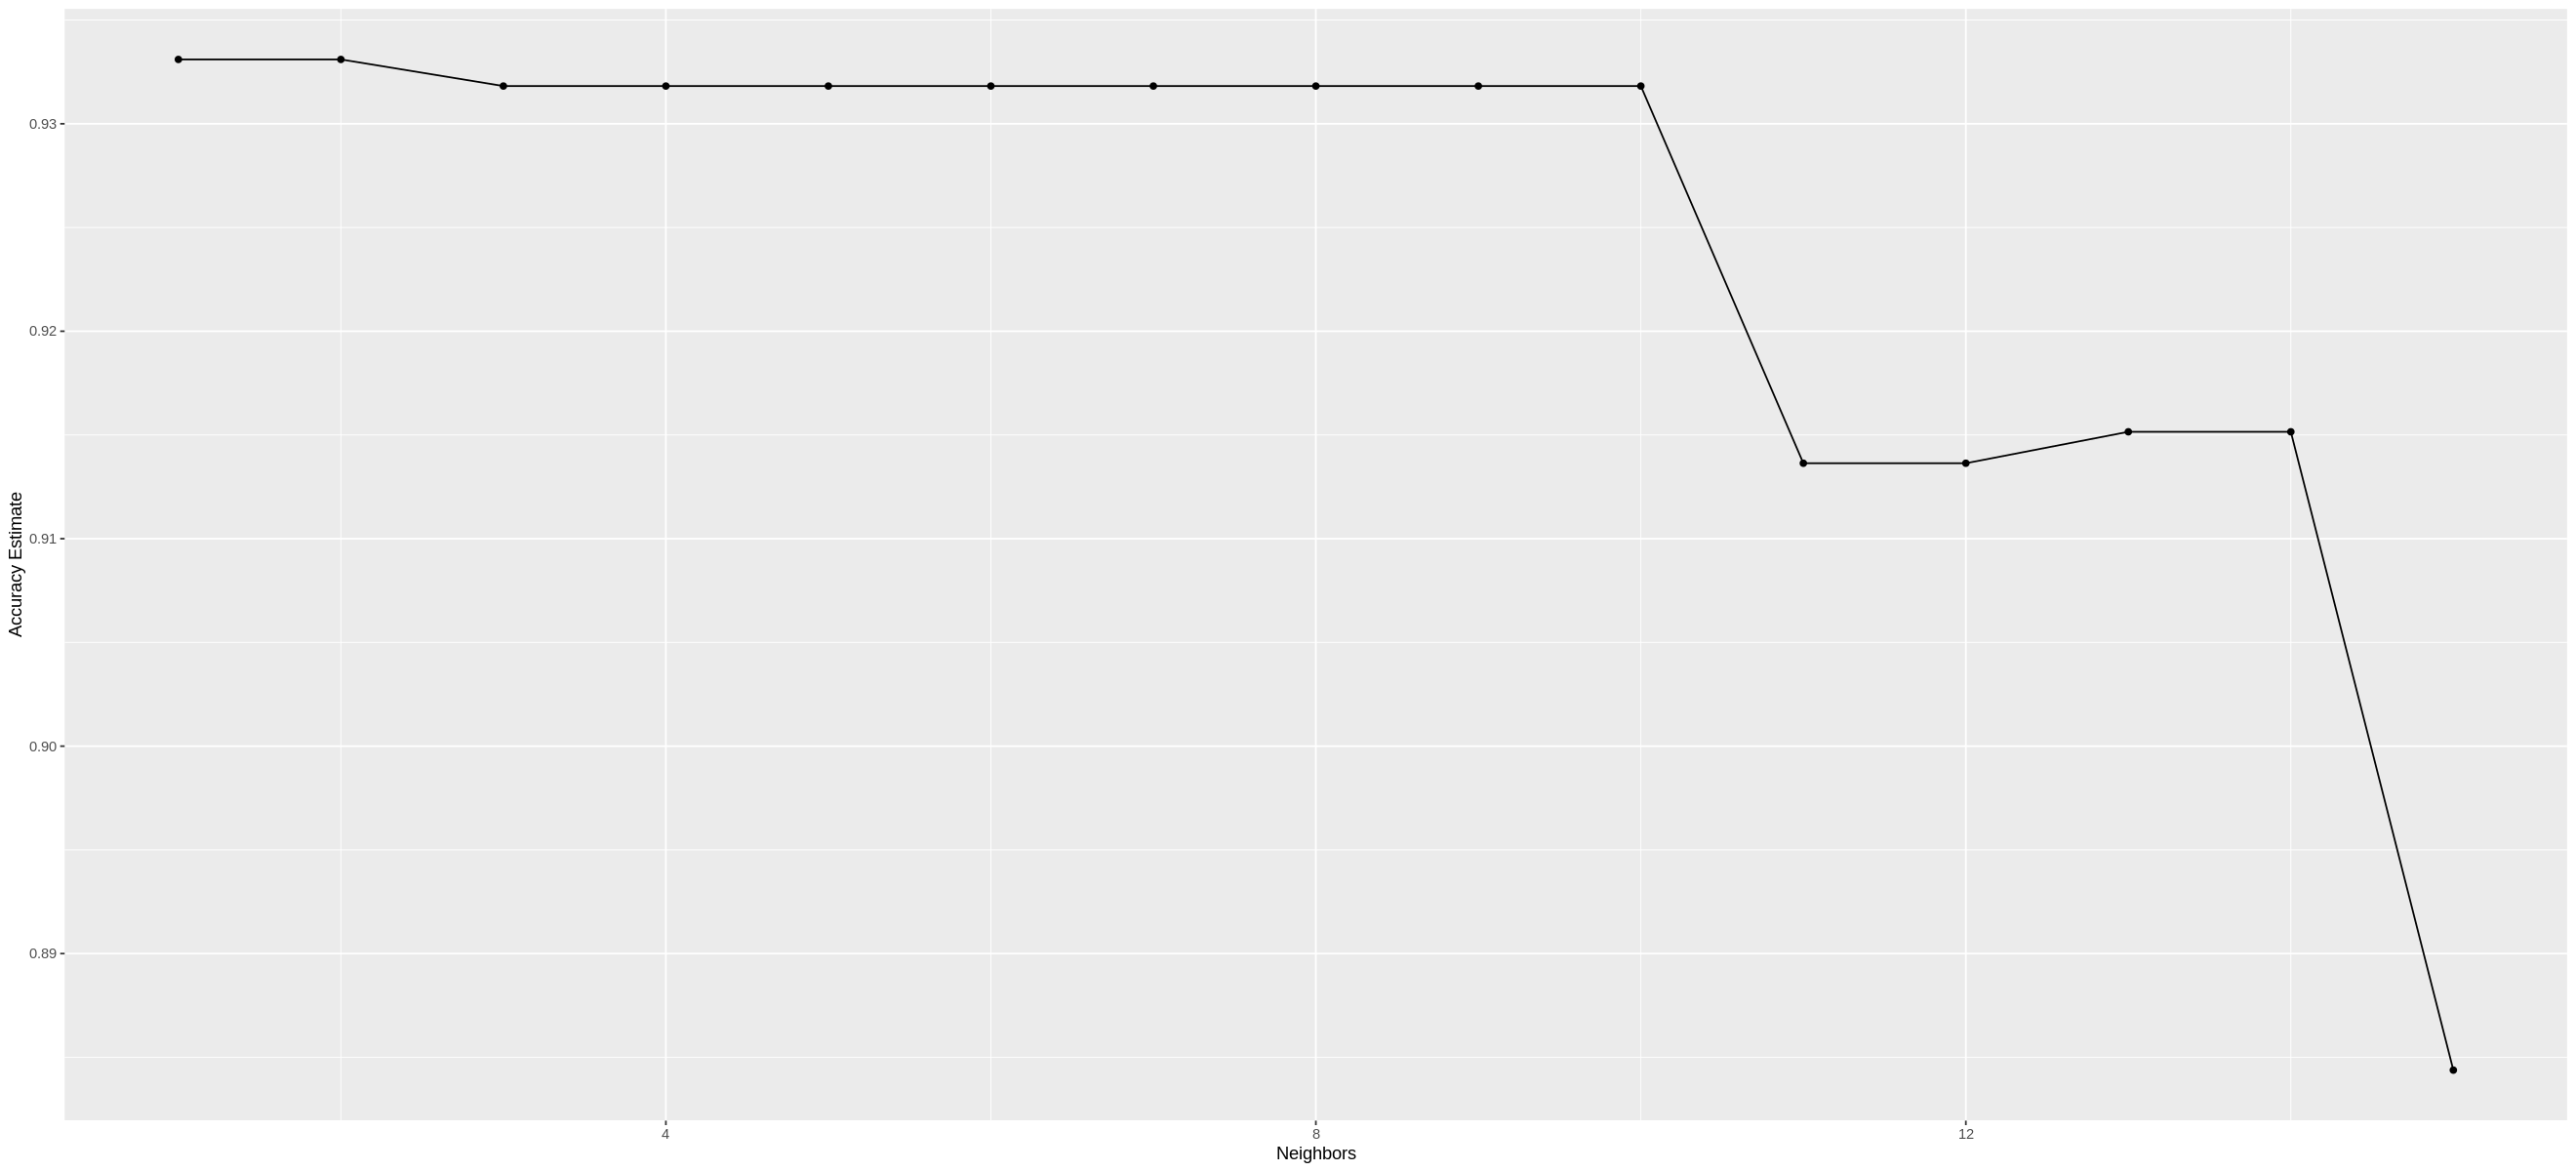

In [312]:
SBA_FWI_recipe_scaled <- recipe(Classes ~ FWI + RH, data=Sidi_Bel_Abbes_train) %>%
    step_scale(all_predictors()) %>%
    step_center(all_predictors())

SBA_knn_spec_C <- nearest_neighbor(weight_func="rectangular", neighbors=5) %>%
    set_engine("kknn") %>%
    set_mode("classification")

SBA_FWI_Fit_C <- workflow() %>%
    add_recipe(SBA_FWI_recipe_scaled) %>%
    add_model(SBA_knn_spec_C) %>%
    fit(data=Sidi_Bel_Abbes_train)

SBA_vfold_FWI_C <- vfold_cv(Sidi_Bel_Abbes_train, v =5 , strata =Classes)

knn_spec_tune <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) %>%
  set_engine("kknn") %>%
  set_mode("classification")

k_vals <- tibble(neighbors = seq(from = 1, to = 15, by = 1))

knn_results_tune <- workflow() %>%
  add_recipe(SBA_FWI_recipe_scaled) %>%
  add_model(knn_spec_tune) %>%
  tune_grid(resamples =SBA_vfold_FWI_C , grid = k_vals) %>%
  collect_metrics()
knn_results_tune

accuracies_SBA_FWI <- knn_results_tune %>%
  filter(.metric == "accuracy")

accuracy_vs_k <- ggplot(accuracies_SBA_FWI, aes(x = neighbors, y = mean)) +
  geom_point() +
  geom_line() +
  labs(x = "Neighbors", y = "Accuracy Estimate")+
  scale_x_continuous()
accuracy_vs_k

SBA_FWI_prediction <- predict(SBA_FWI_Fit_C, Sidi_Bel_Abbes_test) %>%
    bind_cols(Sidi_Bel_Abbes_test)
SBA_FWI_prediction_accuracy <- SBA_FWI_prediction %>%
    metrics(truth=Classes, estimate= .pred_class)
SBA_FWI_prediction_accuracy


neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,binary,0.9512821,5,0.01992342,Model01
1,roc_auc,binary,0.9523810,5,0.01956152,Model01
2,accuracy,binary,0.9512821,5,0.01992342,Model02
2,roc_auc,binary,0.9833333,5,0.01666667,Model02
3,accuracy,binary,0.9833333,5,0.01666667,Model03
3,roc_auc,binary,0.9833333,5,0.01666667,Model03
4,accuracy,binary,0.9833333,5,0.01666667,Model04
4,roc_auc,binary,0.9805556,5,0.01944444,Model04
5,accuracy,binary,0.9666667,5,0.02041241,Model05


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.9166667
kap,binary,0.8322148


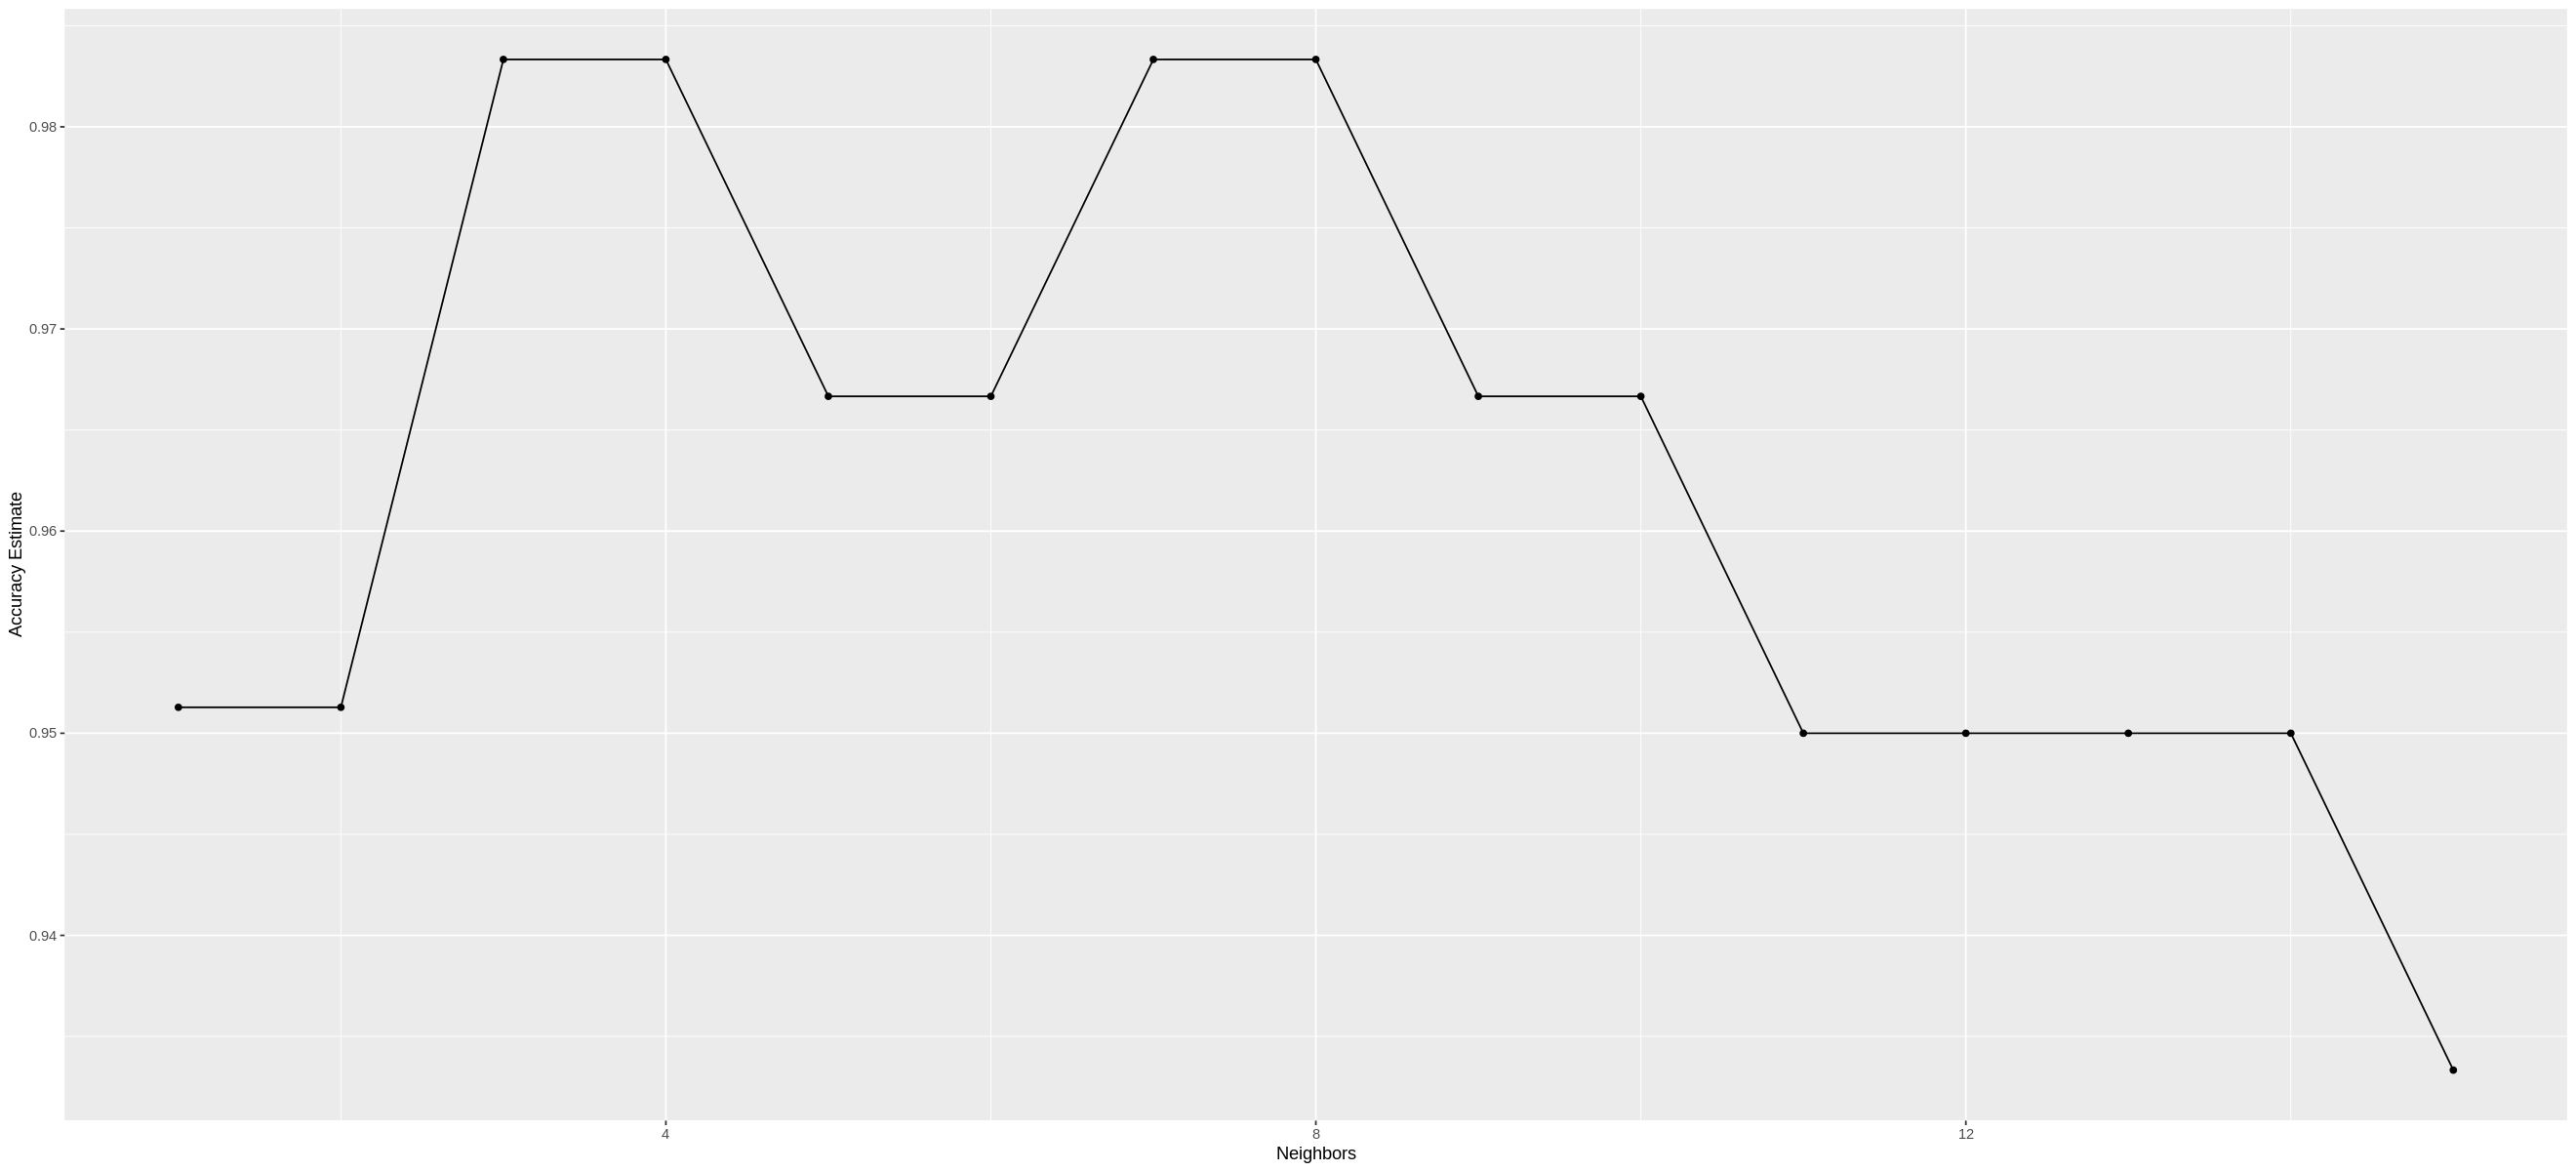

In [313]:
Bej_ISI_recipe_scaled <- recipe(Class ~ ISI + RH, data=Bejaia_train) %>%
    step_scale(all_predictors()) %>%
    step_center(all_predictors())

Bej_knn_spec_ISI <- nearest_neighbor(weight_func="rectangular", neighbors=5) %>%
    set_engine("kknn") %>%
    set_mode("classification")

Bej_ISI_Fit <- workflow() %>%
    add_recipe(Bej_ISI_recipe_scaled) %>%
    add_model(Bej_knn_spec_ISI) %>%
    fit(data=Bejaia_train)

Bej_vfold_ISI <- vfold_cv(Bejaia_train, v =5 , strata =Class)

Bej_knn_spec_tune_ISI<- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) %>%
  set_engine("kknn") %>%
  set_mode("classification")

Bej_k_vals_ISI <- tibble(neighbors = seq(from = 1, to = 15, by = 1))

Bej_knn_results_tune_ISI <- workflow() %>%
  add_recipe(Bej_ISI_recipe_scaled) %>%
  add_model(Bej_knn_spec_tune_ISI) %>%
  tune_grid(resamples =Bej_vfold_ISI , grid = Bej_k_vals_ISI) %>%
  collect_metrics()
Bej_knn_results_tune_ISI

accuracies_bej_ISI <- Bej_knn_results_tune_ISI %>%
  filter(.metric == "accuracy")

accuracy_vs_k_ISI <- ggplot(accuracies_bej_ISI, aes(x = neighbors, y = mean)) +
  geom_point() +
  geom_line() +
  labs(x = "Neighbors", y = "Accuracy Estimate")+
  scale_x_continuous()
accuracy_vs_k_ISI

Bej_ISI_prediction <- predict(Bej_ISI_Fit, Bejaia_test) %>%
    bind_cols(Bejaia_test)

Bej_ISI_prediction_accuracy <- Bej_ISI_prediction %>%
    metrics(truth=Class, estimate= .pred_class)
Bej_ISI_prediction_accuracy



neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,binary,0.9846154,5,0.01538462,Model01
1,roc_auc,binary,0.9875000,5,0.01250000,Model01
2,accuracy,binary,0.9846154,5,0.01538462,Model02
2,roc_auc,binary,0.9875000,5,0.01250000,Model02
3,accuracy,binary,0.9538462,5,0.04615385,Model03
3,roc_auc,binary,0.9875000,5,0.01250000,Model03
4,accuracy,binary,0.9538462,5,0.04615385,Model04
4,roc_auc,binary,0.9775000,5,0.02250000,Model04
5,accuracy,binary,0.9538462,5,0.04615385,Model05


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.9333333
kap,binary,0.8596491


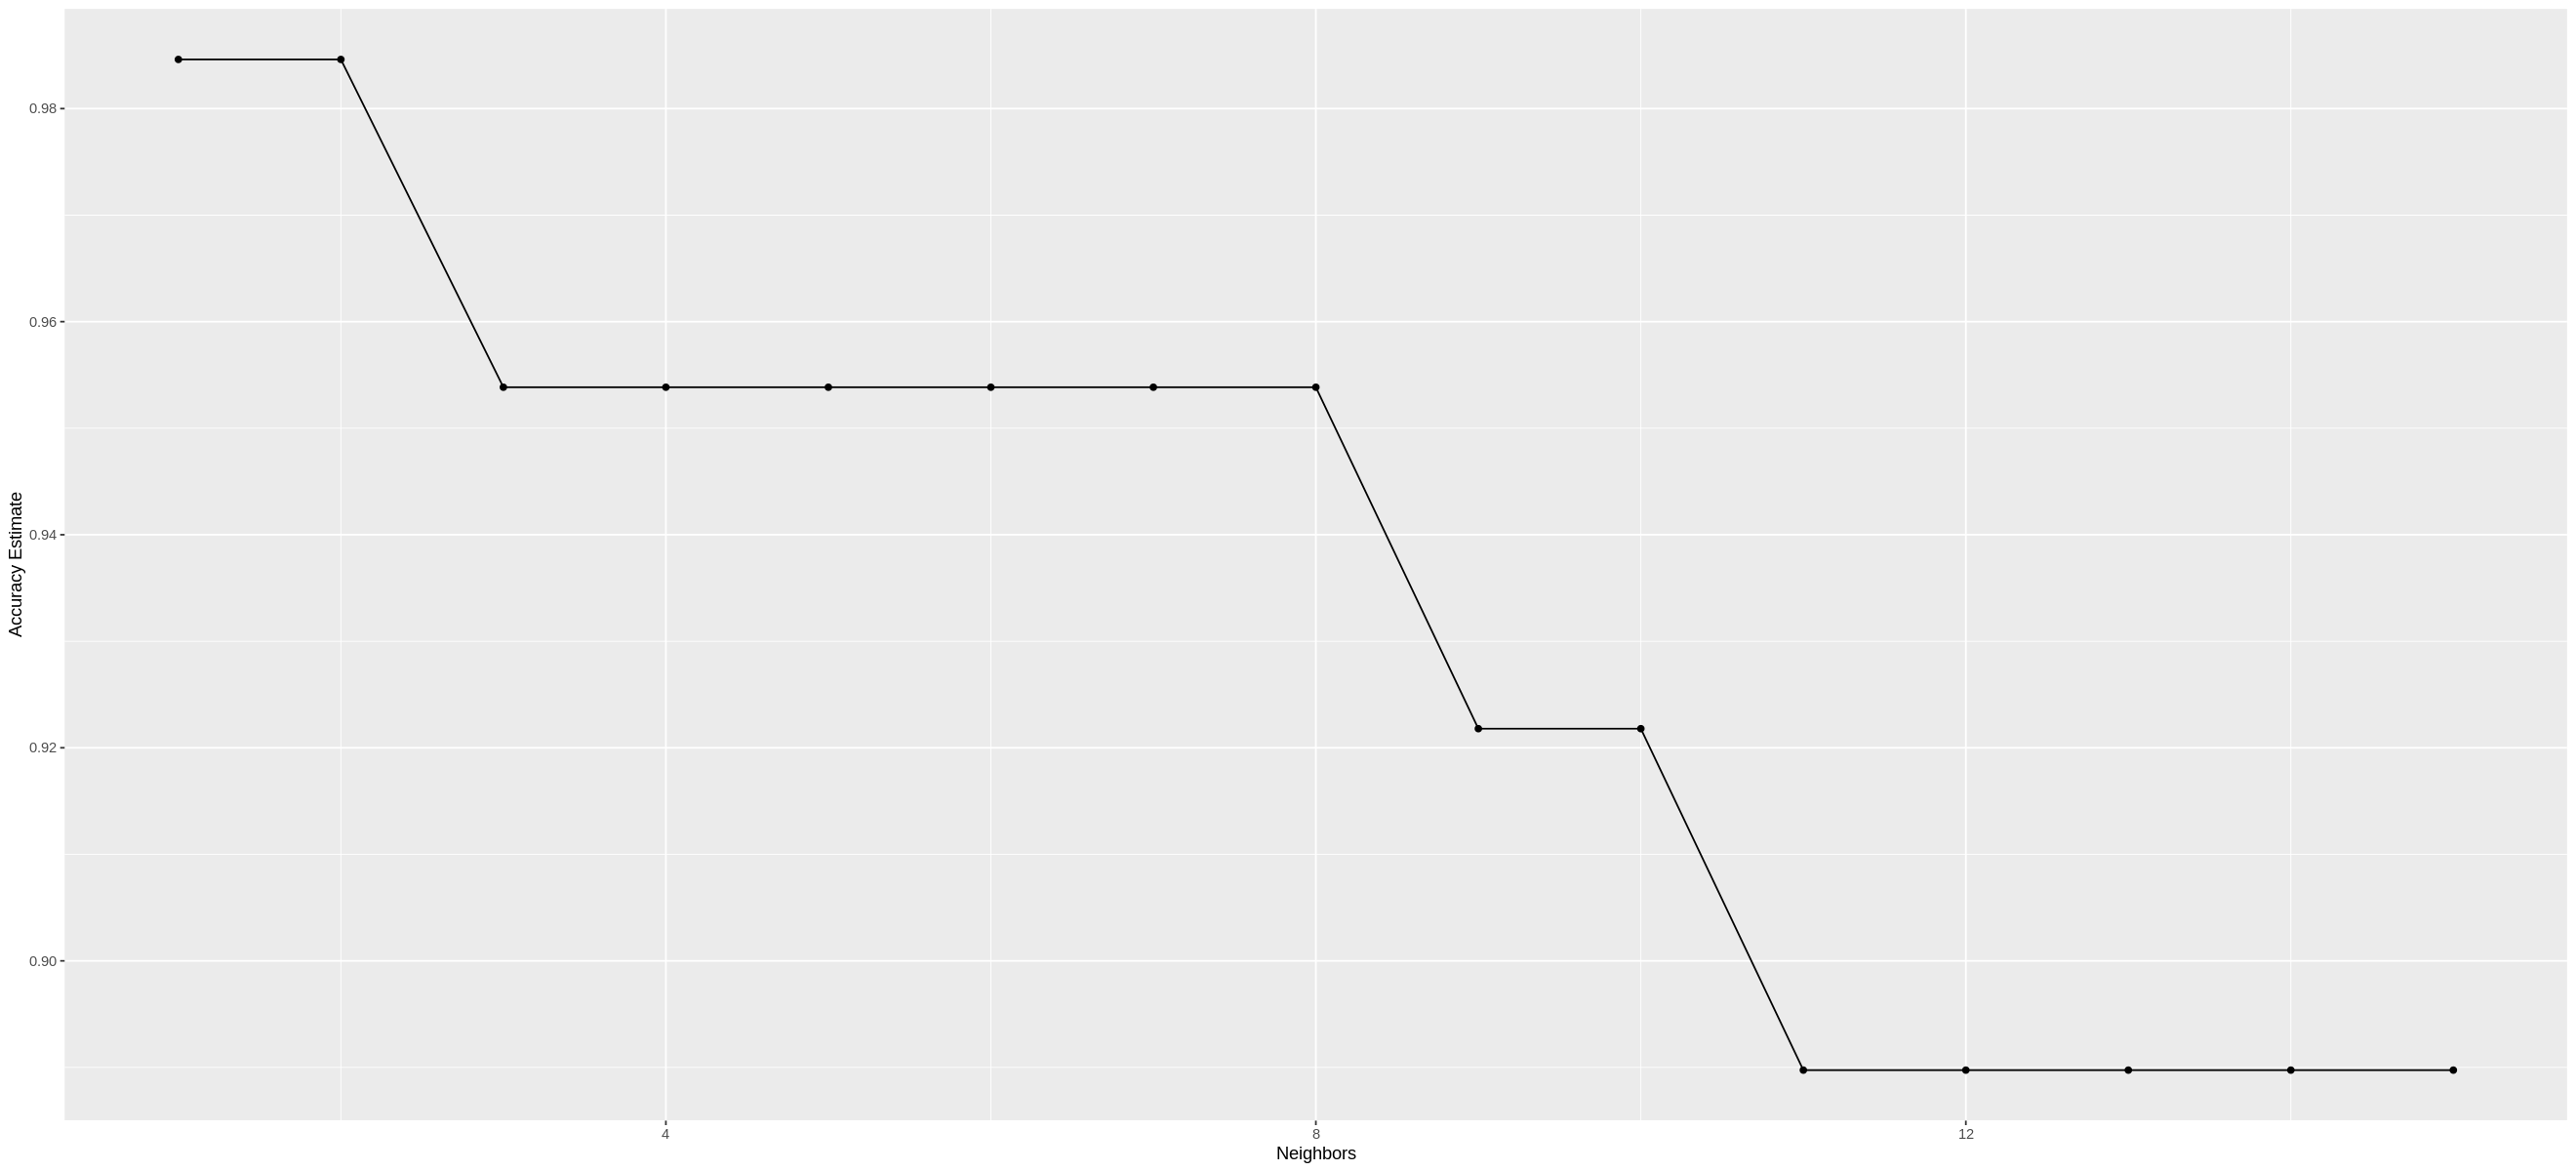

In [314]:
Sidi_ISI_recipe_scaled <- recipe(Classes ~ ISI + RH, data=Sidi_Bel_Abbes_train) %>%
    step_scale(all_predictors()) %>%
    step_center(all_predictors())

Sidi_knn_spec_ISI <- nearest_neighbor(weight_func="rectangular", neighbors=5) %>%
    set_engine("kknn") %>%
    set_mode("classification")

Sidi_ISI_Fit <- workflow() %>%
    add_recipe(Bej_ISI_recipe_scaled) %>%
    add_model(Bej_knn_spec_ISI) %>%
    fit(data=Bejaia_train)


Sidi_vfold_ISI <- vfold_cv(Sidi_Bel_Abbes_train, v =5 , strata =Classes)

Sidi_knn_spec_tune_ISI<- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) %>%
  set_engine("kknn") %>%
  set_mode("classification")

Sidi_k_vals_ISI <- tibble(neighbors = seq(from = 1, to = 15, by = 1))

Sidi_knn_results_tune_ISI <- workflow() %>%
  add_recipe(Sidi_ISI_recipe_scaled) %>%
  add_model(Sidi_knn_spec_tune_ISI) %>%
  tune_grid(resamples =Sidi_vfold_ISI , grid = Sidi_k_vals_ISI) %>%
  collect_metrics()
Sidi_knn_results_tune_ISI

accuracies_Sidi_ISI <- Sidi_knn_results_tune_ISI %>%
  filter(.metric == "accuracy")

Sidi_accuracy_vs_k_ISI <- ggplot(accuracies_Sidi_ISI, aes(x = neighbors, y = mean)) +
  geom_point() +
  geom_line() +
  labs(x = "Neighbors", y = "Accuracy Estimate")+
  scale_x_continuous()
Sidi_accuracy_vs_k_ISI

Sidi_ISI_prediction <- predict(Sidi_ISI_Fit, Sidi_Bel_Abbes_test ) %>%
    bind_cols(Sidi_Bel_Abbes_test)

Sidi_ISI_prediction_accuracy <- Sidi_ISI_prediction %>%
    metrics(truth=Classes, estimate= .pred_class)
Sidi_ISI_prediction_accuracy


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.7166667
kap,binary,0.4333333


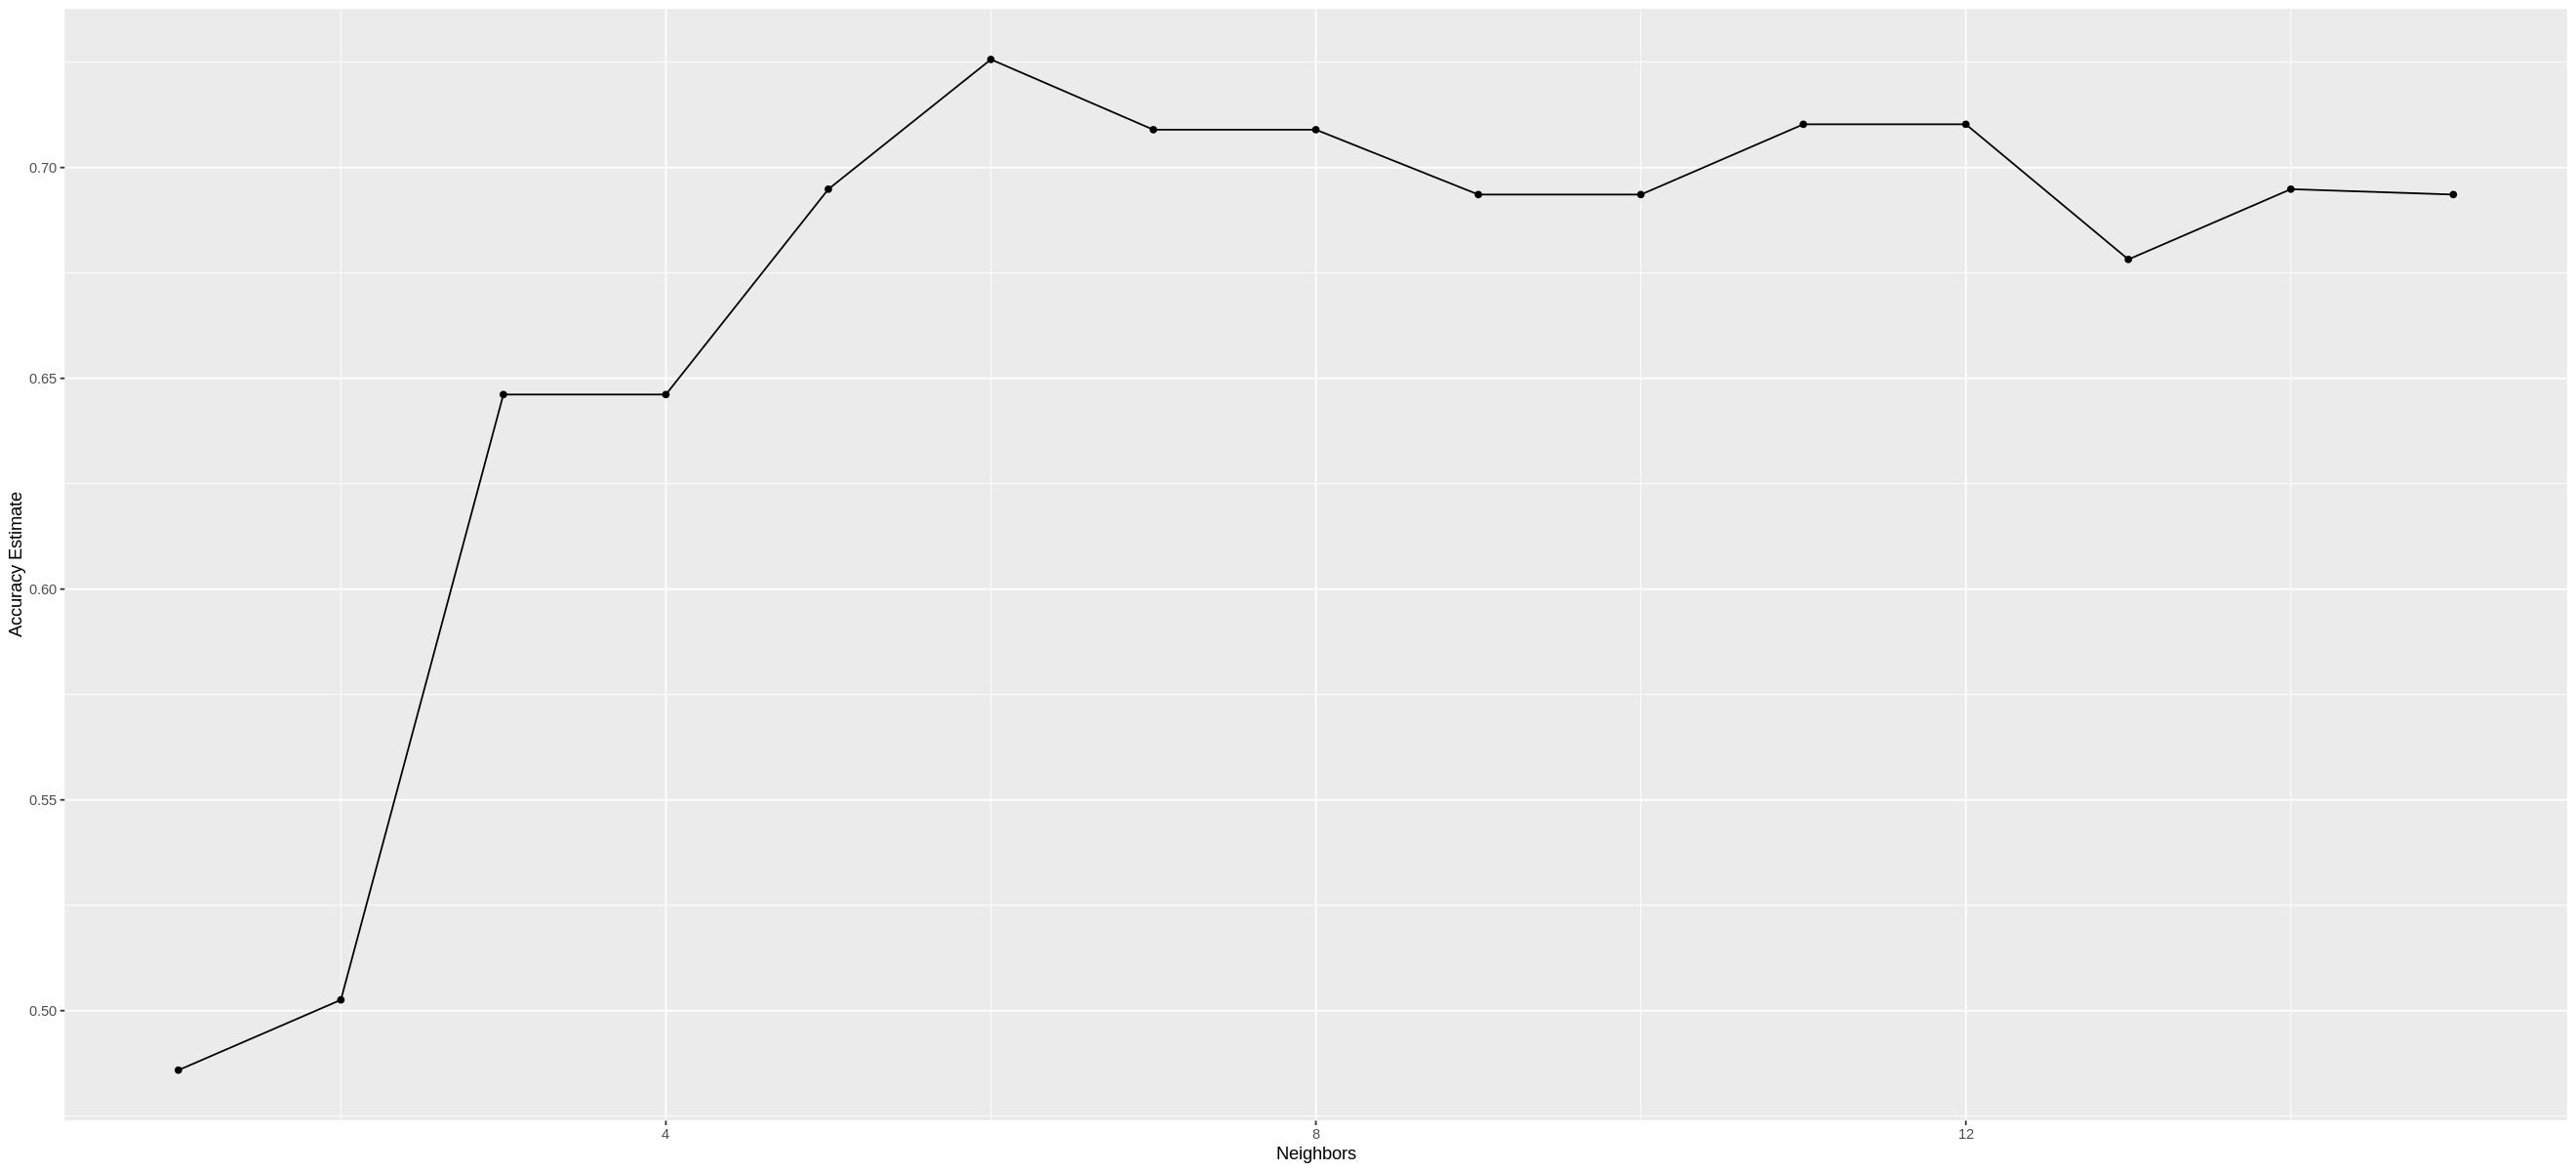

In [315]:
Bej_Tem_recipe_scaled <- recipe(Class ~ Temperature + RH, data=Bejaia_train) %>%
    step_scale(all_predictors()) %>%
    step_center(all_predictors())

knn_Tem_results_tune <- workflow() %>%
  add_recipe(Bej_Tem_recipe_scaled) %>%
  add_model(knn_spec_tune) %>%
  tune_grid(resamples =Bej_vfold_C , grid = k_vals) %>%
  collect_metrics()

accuracies_bej_Tem <- knn_Tem_results_tune %>%
  filter(.metric == "accuracy")

accuracy_vs_k <- ggplot(accuracies_bej_Tem, aes(x = neighbors, y = mean)) +
  geom_point() +
  geom_line() +
  labs(x = "Neighbors", y = "Accuracy Estimate")+
  scale_x_continuous()
accuracy_vs_k

Bej_knn_spec_Tem_C <- nearest_neighbor(weight_func="rectangular", neighbors=7) %>%
    set_engine("kknn") %>%
    set_mode("classification")

Bej_Tem_Fit_C <- workflow() %>%
    add_recipe(Bej_Tem_recipe_scaled) %>%
    add_model(Bej_knn_spec_Tem_C) %>%
    fit(data=Bejaia_train)

Bej_Tem_prediction <- predict(Bej_Tem_Fit_C, Bejaia_test) %>%
    bind_cols(Bejaia_test)


Bej_Tem_prediction_accuracy <- Bej_Tem_prediction %>%
    metrics(truth=Class, estimate= .pred_class)
Bej_Tem_prediction_accuracy




In [ ]:
Sidi_Temp_recipe_scaled <- recipe(Classes ~ Temperature + RH, data=Sidi_Bel_Abbes_train) %>%
    step_scale(all_predictors()) %>%
    step_center(all_predictors())

Sidi_knn_spec_Temp <- nearest_neighbor(weight_func="rectangular", neighbors=5) %>%
    set_engine("kknn") %>%
    set_mode("classification")

Sidi_Temp_Fit <- workflow() %>%
    add_recipe(Sidi_DC_recipe_scaled) %>%
    add_model(Sidi_knn_spec_DC) %>%
    fit(data=Sidi_Bel_Abbes_train)

Sidi_vfold_Temp <- vfold_cv(Sidi_Bel_Abbes_train, v =5 , strata =Classes)

Sidi_knn_spec_tune_Temp<- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) %>%
  set_engine("kknn") %>%
  set_mode("classification")

Sidi_k_vals_Temp <- tibble(neighbors = seq(from = 1, to = 15, by = 1))

Sidi_knn_results_tune_Temp <- workflow() %>%
  add_recipe(Sidi_Temp_recipe_scaled) %>%
  add_model(Sidi_knn_spec_tune_Temp) %>%
  tune_grid(resamples =Sidi_vfold_Temp , grid = Sidi_k_vals_Temp) %>%
  collect_metrics()
Sidi_knn_results_tune_Temp

accuracies_Sidi_Temp <- Sidi_knn_results_tune_Temp %>%
  filter(.metric == "accuracy")

Sidi_accuracy_vs_k_Temp <- ggplot(accuracies_Sidi_Temp, aes(x = neighbors, y = mean)) +
  geom_point() +
  geom_line() +
  labs(x = "Neighbors", y = "Accuracy Estimate")+
  scale_x_continuous()
Sidi_accuracy_vs_k_Temp

Sidi_Temp_prediction <- predict(Sidi_Temp_Fit, Sidi_Bel_Abbes_test ) %>%
    bind_cols(Sidi_Bel_Abbes_test)

Sidi_Temp_prediction_accuracy <- Sidi_Temp_prediction %>%
    metrics(truth=Classes, estimate= .pred_class)
Sidi_Temp_prediction_accuracy

In [ ]:
Bej_Rain_recipe_scaled <- recipe(Class ~ Rain + RH, data=Bejaia_train) %>%
    step_scale(all_predictors()) %>%
    step_center(all_predictors())

set.seed(1)

In [ ]:
knn_results_tune_Bej_Rain <- workflow() %>%
  add_recipe(Bej_Rain_recipe_scaled) %>%
  add_model(knn_spec_tune) %>%
  tune_grid(resamples =Bej_vfold_C , grid = k_vals) %>%
  collect_metrics()
#knn_results_tune

accuracies_bej_Rain <- knn_results_tune_Bej_Rain %>%
  filter(.metric == "accuracy")

accuracy_vs_k_Bej_Rain <- ggplot(accuracies_bej_Rain, aes(x = neighbors, y = mean)) +
  geom_point() +
  geom_line() +
  labs(x = "Neighbors", y = "Accuracy Estimate")+
  scale_x_continuous()
accuracy_vs_k_Bej_Rain


In [ ]:

Bej_knn_spec_Rain <- nearest_neighbor(weight_func="rectangular", neighbors=4) %>%
    set_engine("kknn") %>%
    set_mode("classification")

Bej_Rain_Fit_ <- workflow() %>%
    add_recipe(Bej_Rain_recipe_scaled) %>%
    add_model(Bej_knn_spec_Rain) %>%
    fit(data=Bejaia_train)


Bej_Rain_prediction <- predict(Bej_Rain_Fit_, Bejaia_test) %>%
    bind_cols(Bejaia_test)

Bej_Rain_prediction_accuracy <- Bej_Rain_prediction %>%
    metrics(truth=Class, estimate= .pred_class)
Bej_Rain_prediction_accuracy

Expected outcomes and significance:

 In this study we expect to discover a relationship between the most contributing atmospheric condition(s) of the area to the presence of fire. If we can determine a reliable relationship we can attempt to predict areas with a high likelihood of fire. This information can alos allow proper allocation of fire fighting resources to vulnerable areas. We hope our findings can lead to a better understanding of how and why fires occur in forests and how the changing global climate will affect the location and frequency of forest fires.
    